

# Practical of Real Financial Data



---
This script includes an end-to-end unsupervised and supervised learning task including finanial data. Specifically, we look at SMEs that have applied for a loan at a P2P lending platform. The tasks of the practical sesssion are

*   Describe the data and carry-out all necessary pre-processing
*   Run k-means clustering using different k values
*   Evaluate the perfromance of the different clusters and select the best value for k
*   Train a logistic regression classifier that predicts whether the company will default on its loan using the full dataset
*   Train a separate model for each of the identified clusters



In [ ]:
# We start with importing the necessary libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import MaxNLocator # PyLab is a procedural interface to the Matplotlib object-oriented plotting library.
import seaborn as sns
%matplotlib inline

In [ ]:
# To make this notebook's output stable across runs (we make the output reproducable)
np.random.seed(42)

In [ ]:
# Define cluster_kmeans function
from sklearn.cluster import KMeans
from sklearn import metrics
# from sklearn.metrics import pairwise_distances

# silhouette: 1=good, 0=overlap, -1=bad
# Within Cluster Sum of Squares: lower is better

def cluster_kmeans(df, nclust):

    kmeans = KMeans(n_clusters=nclust, random_state=0).fit(df)
    label = kmeans.labels_
    centroids = kmeans.cluster_centers_
    sil=metrics.silhouette_score(df, label, metric='euclidean', random_state=0)
    wcss = kmeans.inertia_

    return sil, wcss, label, centroids

In [ ]:
# Let's try it on real data --> import file borrower_companies.csv
# Details on the dataset:
# The dataset covers the financial perfromance of 4,514 SMEs that have applied for a loan though a P2P lending platform.
# Specifically, the data contains information on 19 financial ratios (extracted from the companies' annual financial statements).
# Moreover, the dataset also contains a "status" variable which indicates whether the company has paid back or defaulted on it loan.

from google.colab import files
uploaded = files.upload()

Saving borrower_companies (1).csv to borrower_companies (1).csv


In [ ]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded['borrower_companies.csv']))

KeyError: 'borrower_companies.csv'

In [ ]:
# In the following steps, we investigate the properties of the data.
dataset.head()

ratio001  ratio002  ratio003  ratio004  ratio005  ratio006  ratio008  \
0    180.39      0.00      1.01      1.06      1.06      2.25    -48.31   
1      3.73      0.21      1.27      1.41      1.35      1.89     13.57   
2      0.19      0.00      6.18      3.28      3.28      1.79    -17.72   
3     -1.49      0.00      0.33      0.10      0.10     -2.73    -53.41   
4     -1.21      0.00      0.17      0.14      0.14    -28.95    -58.08   

   ratio011  ratio012  ratio017  ratio018  ratio019  ratio027  ratio029  \
0      0.00     -0.79      1.08      0.87     -0.02    277.13      0.00   
1      0.11      0.27      1.72      1.70      0.07     21.40      0.10   
2     -0.28     -0.36      5.02      5.64     -0.06    -16.50     -0.05   
3     -0.79     -0.39      0.95      0.85     -0.02    -42.31     -0.66   
4     -1.02     -0.23      4.40      4.38     -0.02    -57.31     -0.23   

   ratio030  DIO  DPO  DSO  turnover  status  
0      0.00    1  283    0      3437       1  
1      0.10    7   61   75      1991       1  
2     -0.05    0    5   27      1739       1  
3     -0.74    0    0    0      1499       1  
4     -0.23    0  444    0      1244       1

In [ ]:
dataset.shape

(4514, 20)

In [ ]:
dataset.dtypes

ratio001    float64
ratio002    float64
ratio003    float64
ratio004    float64
ratio005    float64
ratio006    float64
ratio008    float64
ratio011    float64
ratio012    float64
ratio017    float64
ratio018    float64
ratio019    float64
ratio027    float64
ratio029    float64
ratio030    float64
DIO           int64
DPO           int64
DSO           int64
turnover      int64
status        int64
dtype: object

In [ ]:
dataset.isna().any()

ratio001    False
ratio002    False
ratio003    False
ratio004    False
ratio005    False
ratio006    False
ratio008    False
ratio011    False
ratio012    False
ratio017    False
ratio018    False
ratio019    False
ratio027    False
ratio029    False
ratio030    False
DIO         False
DPO         False
DSO         False
turnover    False
status      False
dtype: bool

In [ ]:
dataset.describe()

ratio001     ratio002     ratio003     ratio004     ratio005  \
count  4514.000000  4514.000000  4514.000000  4514.000000  4514.000000   
mean      8.885091     1.264107     1.443505     1.535791     1.189956   
std      19.154547     3.333365     0.760904     1.201232     1.023862   
min     -64.430000    -9.580000     0.170000     0.010000     0.000000   
25%       1.302500     0.000000     1.070000     0.970000     0.610000   
50%       3.770000     0.090000     1.200000     1.220000     0.990000   
75%       9.680000     1.170000     1.520000     1.720000     1.407500   
max     206.550000    33.380000     8.270000    13.710000    10.880000   

          ratio006     ratio008     ratio011     ratio012     ratio017  \
count  4514.000000  4514.000000  4514.000000  4514.000000  4514.000000   
mean      7.726227    23.067767     0.027758    -0.068855     1.371943   
std      23.277207    70.271262     0.146976     0.790180     1.068066   
min     -33.140000  -285.860000    -1.280000    -8.540000     0.010000   
25%       0.940000     1.240000     0.010000     0.000000     0.680000   
50%       1.720000     3.590000     0.030000     0.070000     1.170000   
75%       4.890000    16.317500     0.070000     0.210000     1.740000   
max     297.020000   566.960000     0.490000     1.080000     8.420000   

          ratio018     ratio019     ratio027     ratio029     ratio030  \
count  4514.000000  4514.000000  4514.000000  4514.000000  4514.000000   
mean      1.335310     0.193961    36.512853     0.061914     0.068447   
std       1.063796     0.498315    92.892915     0.196240     0.215709   
min       0.010000    -3.320000  -191.630000    -2.080000    -2.390000   
25%       0.640000     0.010000     2.470000     0.020000     0.020000   
50%       1.130000     0.100000     7.305000     0.060000     0.060000   
75%       1.700000     0.390000    27.607500     0.110000     0.120000   
max       8.420000     3.950000   747.010000     0.940000     1.280000   

               DIO          DPO          DSO      turnover       status  
count  4514.000000  4514.000000  4514.000000   4514.000000  4514.000000  
mean    105.227736    75.934205    95.731945   3344.478511     0.110323  
std     355.807161   111.650905   128.370308   7580.558788     0.313327  
min       0.000000     0.000000     0.000000      6.000000     0.000000  
25%       1.000000     0.000000     0.000000    594.000000     0.000000  
50%      19.000000    51.000000    67.000000   1123.500000     0.000000  
75%      80.000000    99.750000   136.000000   2761.750000     0.000000  
max    5569.000000  1467.000000  1465.000000  76403.000000     1.000000

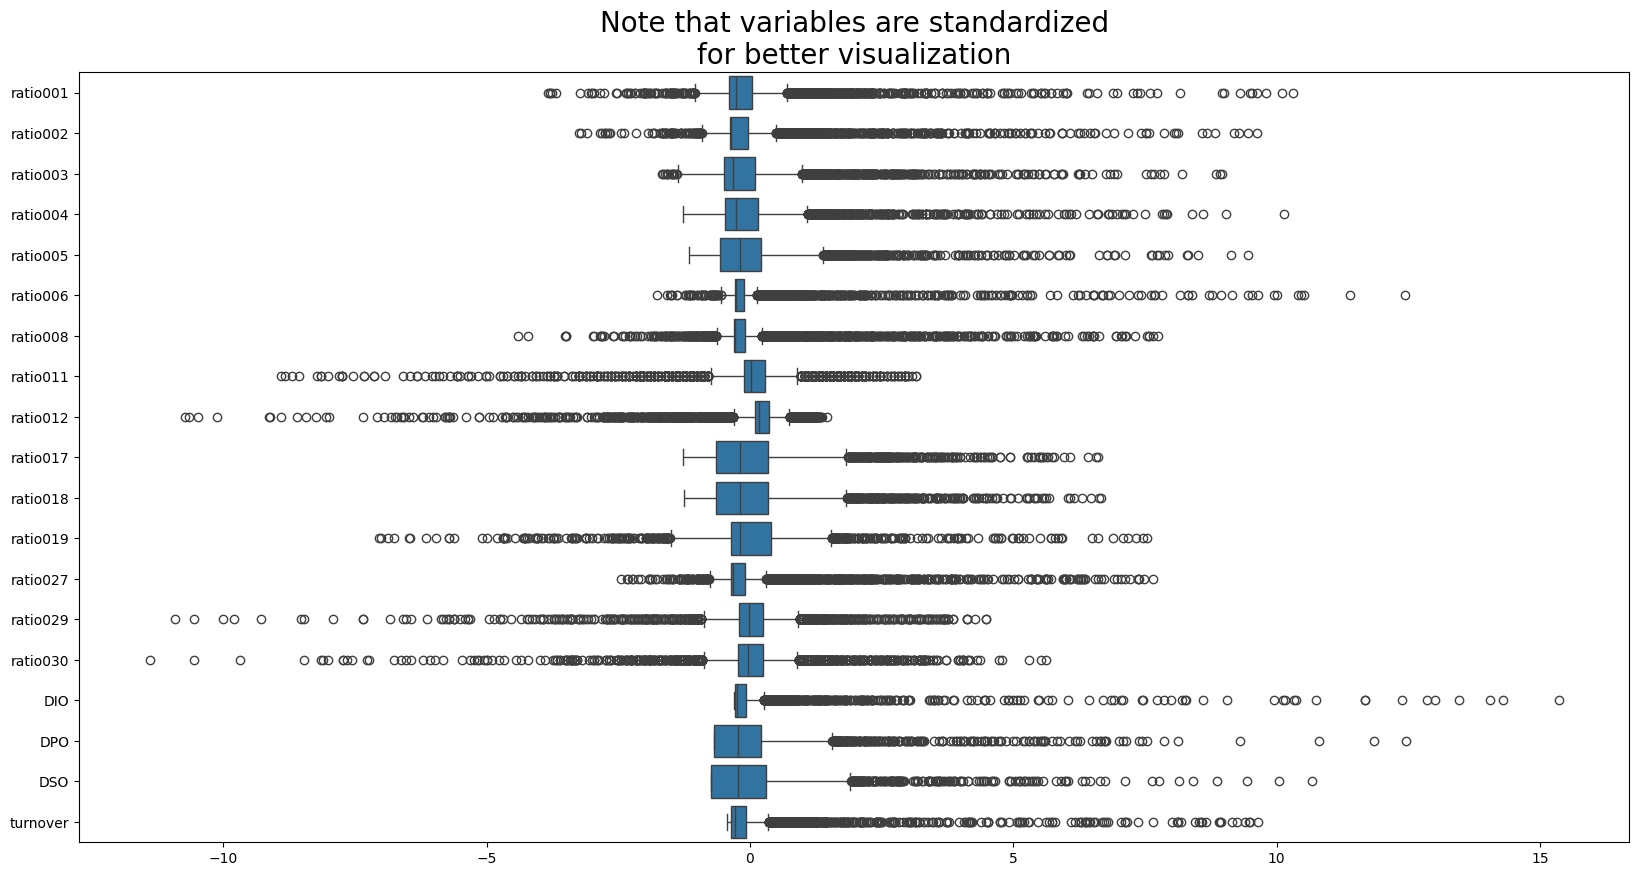

In [ ]:
# We check the distribution of the features included in the dataset through box plots. A box plot is a method for graphically depicting groups of numerical data through their quartiles.
from sklearn import preprocessing
def box_plot(df, standardize=True):

    fig=plt.figure(figsize=(20,10))

    if standardize==True:
        # standardize columns for better visualization
        df=pd.DataFrame(preprocessing.StandardScaler().fit_transform(df.values), columns = df.columns) # Standard.Scaler (x-m)/s
    fig=sns.boxplot(x='value', y='variable', data=pd.melt(df.reset_index(), id_vars='index', value_vars=list(df.columns)),
               orient='h')
    fig.tick_params(labelsize=10)
    fig.set_xlabel('')
    fig.set_ylabel('')
    fig.set_title('Note that variables are standardized\nfor better visualization', fontsize=20)
    plt.show()


box_plot(dataset.drop(columns="status"), standardize=True)

In [ ]:
# The abave graph indicated the presence of many outliers. In the following step we apply the z-score.
# A z-score indicated the number of standard deviations above or below the mean that each value falls.
# For example, a Z-score of 3 indicates that an observation is three standard deviations above the average
# while a Z-score of -3 signifies it is three standard deviations below the mean. A standard cut-off value for
# finding outliers are Z-scores of +/-3 or 4 further from zero
from scipy import stats
z = np.abs(stats.zscore(dataset))
dataset_o = dataset[(z < 4).all(axis=1)]

In [ ]:
# We check the shape of the new data. We have reduced the dataset significantly
dataset_o.shape

(3752, 20)

In [ ]:
dataset_o.describe()

ratio001     ratio002     ratio003     ratio004     ratio005  \
count  3752.000000  3752.000000  3752.000000  3752.000000  3752.000000   
mean      7.197996     1.020149     1.393659     1.427508     1.128204   
std      12.336523     2.200180     0.540149     0.815380     0.751577   
min     -63.710000    -9.420000     0.210000     0.010000     0.000000   
25%       1.500000     0.000000     1.080000     0.970000     0.640000   
50%       3.860000     0.130000     1.210000     1.220000     0.990000   
75%       9.150000     1.190000     1.500000     1.670000     1.390000   
max      84.220000    14.180000     4.450000     6.300000     5.240000   

          ratio006     ratio008     ratio011     ratio012     ratio017  \
count  3752.000000  3752.000000  3752.000000  3752.000000  3752.000000   
mean      5.254459    18.005669     0.042503     0.016692     1.370824   
std      11.275803    46.493622     0.102045     0.509346     0.914645   
min     -26.530000  -223.200000    -0.540000    -3.200000     0.010000   
25%       0.950000     1.450000     0.020000     0.010000     0.750000   
50%       1.710000     3.895000     0.040000     0.080000     1.210000   
75%       4.457500    15.892500     0.080000     0.220000     1.740000   
max     100.360000   299.410000     0.490000     1.080000     5.580000   

          ratio018     ratio019     ratio027     ratio029     ratio030  \
count  3752.000000  3752.000000  3752.000000  3752.000000  3752.000000   
mean      1.330064     0.204046    28.268630     0.075762     0.081946   
std       0.909313     0.376043    59.079722     0.134543     0.148049   
min       0.010000    -1.780000  -191.630000    -0.720000    -0.720000   
25%       0.720000     0.020000     2.900000     0.030000     0.030000   
50%       1.170000     0.120000     7.735000     0.060000     0.060000   
75%       1.700000     0.390000    26.532500     0.110000     0.120000   
max       5.570000     2.170000   406.570000     0.800000     0.930000   

               DIO          DPO          DSO      turnover       status  
count  3752.000000  3752.000000  3752.000000   3752.000000  3752.000000  
mean     67.855544    65.358742    86.480544   2644.707623     0.088220  
std     137.992908    73.751854    95.299238   4090.051189     0.283652  
min       0.000000     0.000000     0.000000      6.000000     0.000000  
25%       1.000000     0.000000     0.000000    637.000000     0.000000  
50%      19.000000    50.000000    68.000000   1175.000000     0.000000  
75%      75.000000    96.000000   134.000000   2759.500000     0.000000  
max    1476.000000   521.000000   607.000000  33500.000000     1.000000

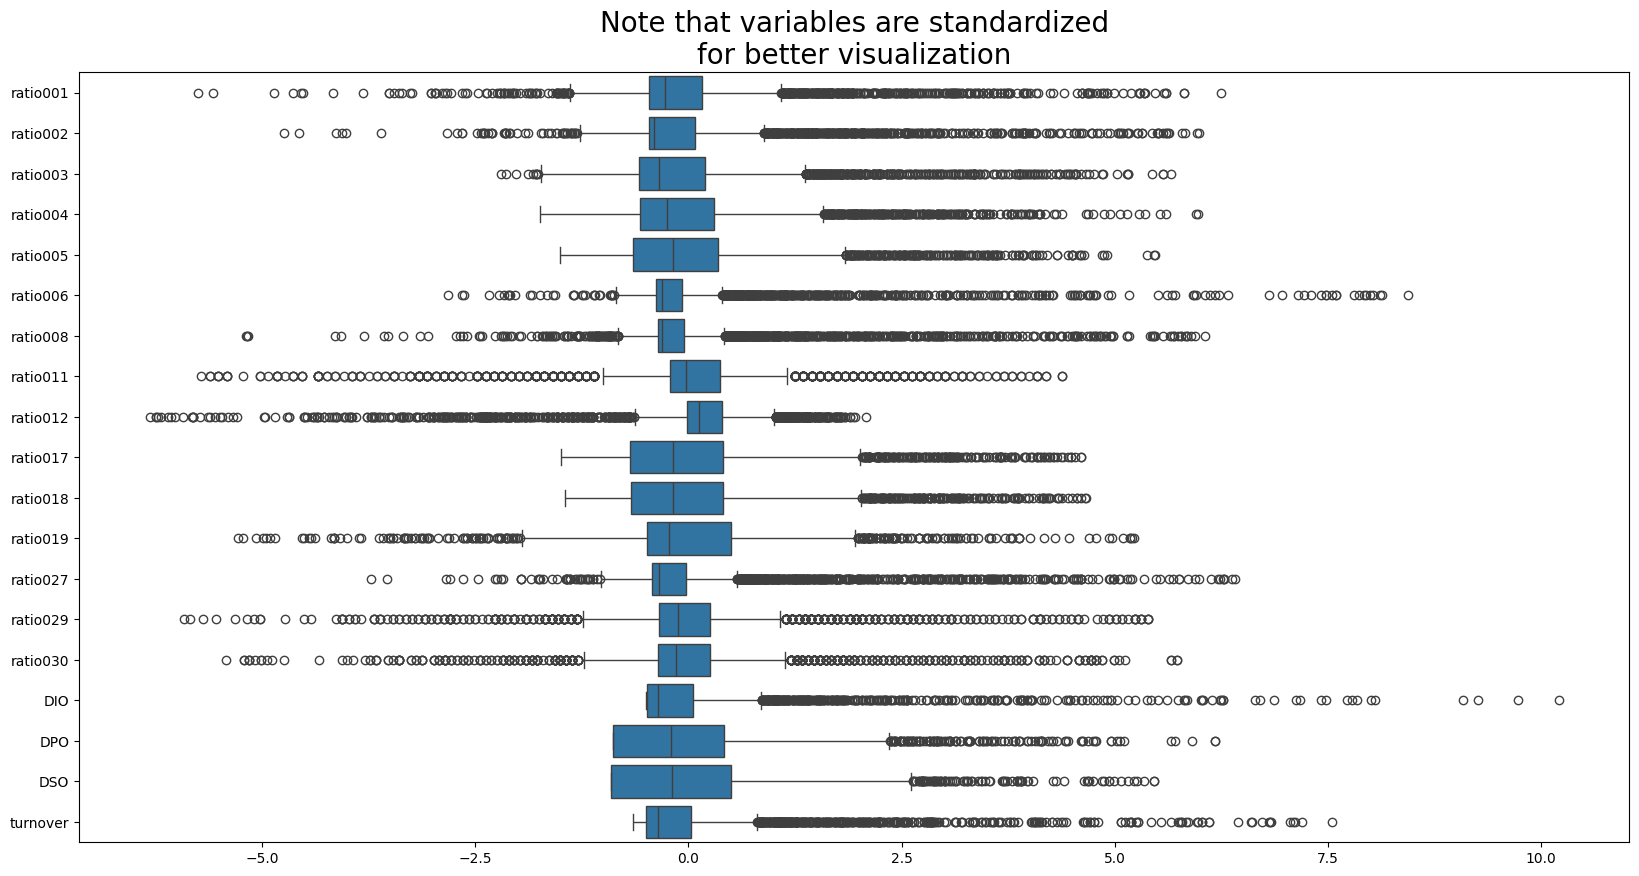

In [ ]:
# Simiarly, we again check the distribution of the features through box plot. Although reduced, we still have significant amount of outliers in the sample.
box_plot(dataset_o.drop(columns="status"), standardize=True)

In [ ]:
# In the next section, we proceed with running a clustering algorithm on the data so to identify groups of homogenous borrower-companies.
X = dataset_o.drop(columns="status")
y = dataset_o.copy().status
X = pd.DataFrame(preprocessing.StandardScaler().fit_transform(X.values), columns = X.columns)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


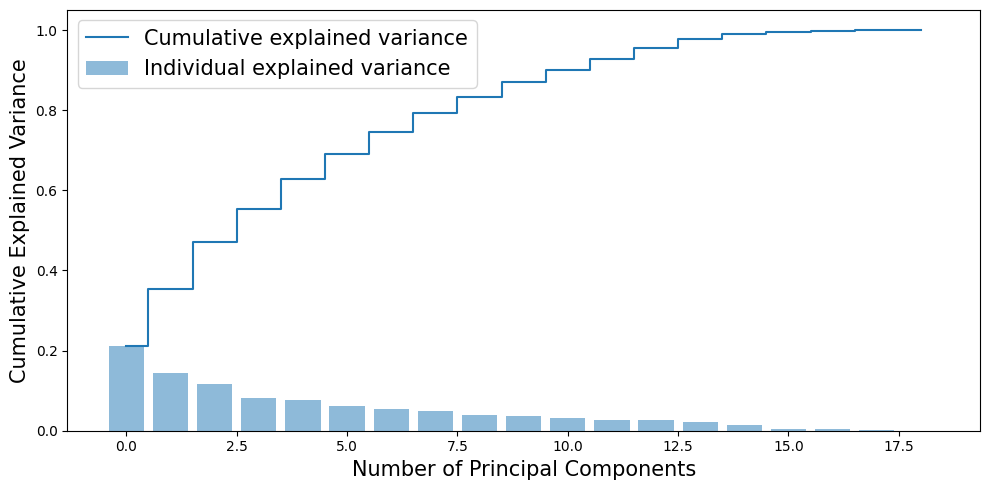

In [ ]:
# Since, we cannot plot the data as it is multidimensional, we use the dimensionality reduction technique - Principal Component Analysis (PCA).
# We notice that the first 2 PC account for ~40% of the variations in the dataset.

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px

pca = PCA(n_components=X.shape[1], random_state=0).fit(X)
scores = pca.transform(StandardScaler().fit_transform(X))

exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.figure(figsize=(10,5))
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Cumulative Explained Variance', size=15)
plt.xlabel('Number of Principal Components', size=15)
plt.legend(loc='best', fontsize=15)
plt.tight_layout()
plt.show()

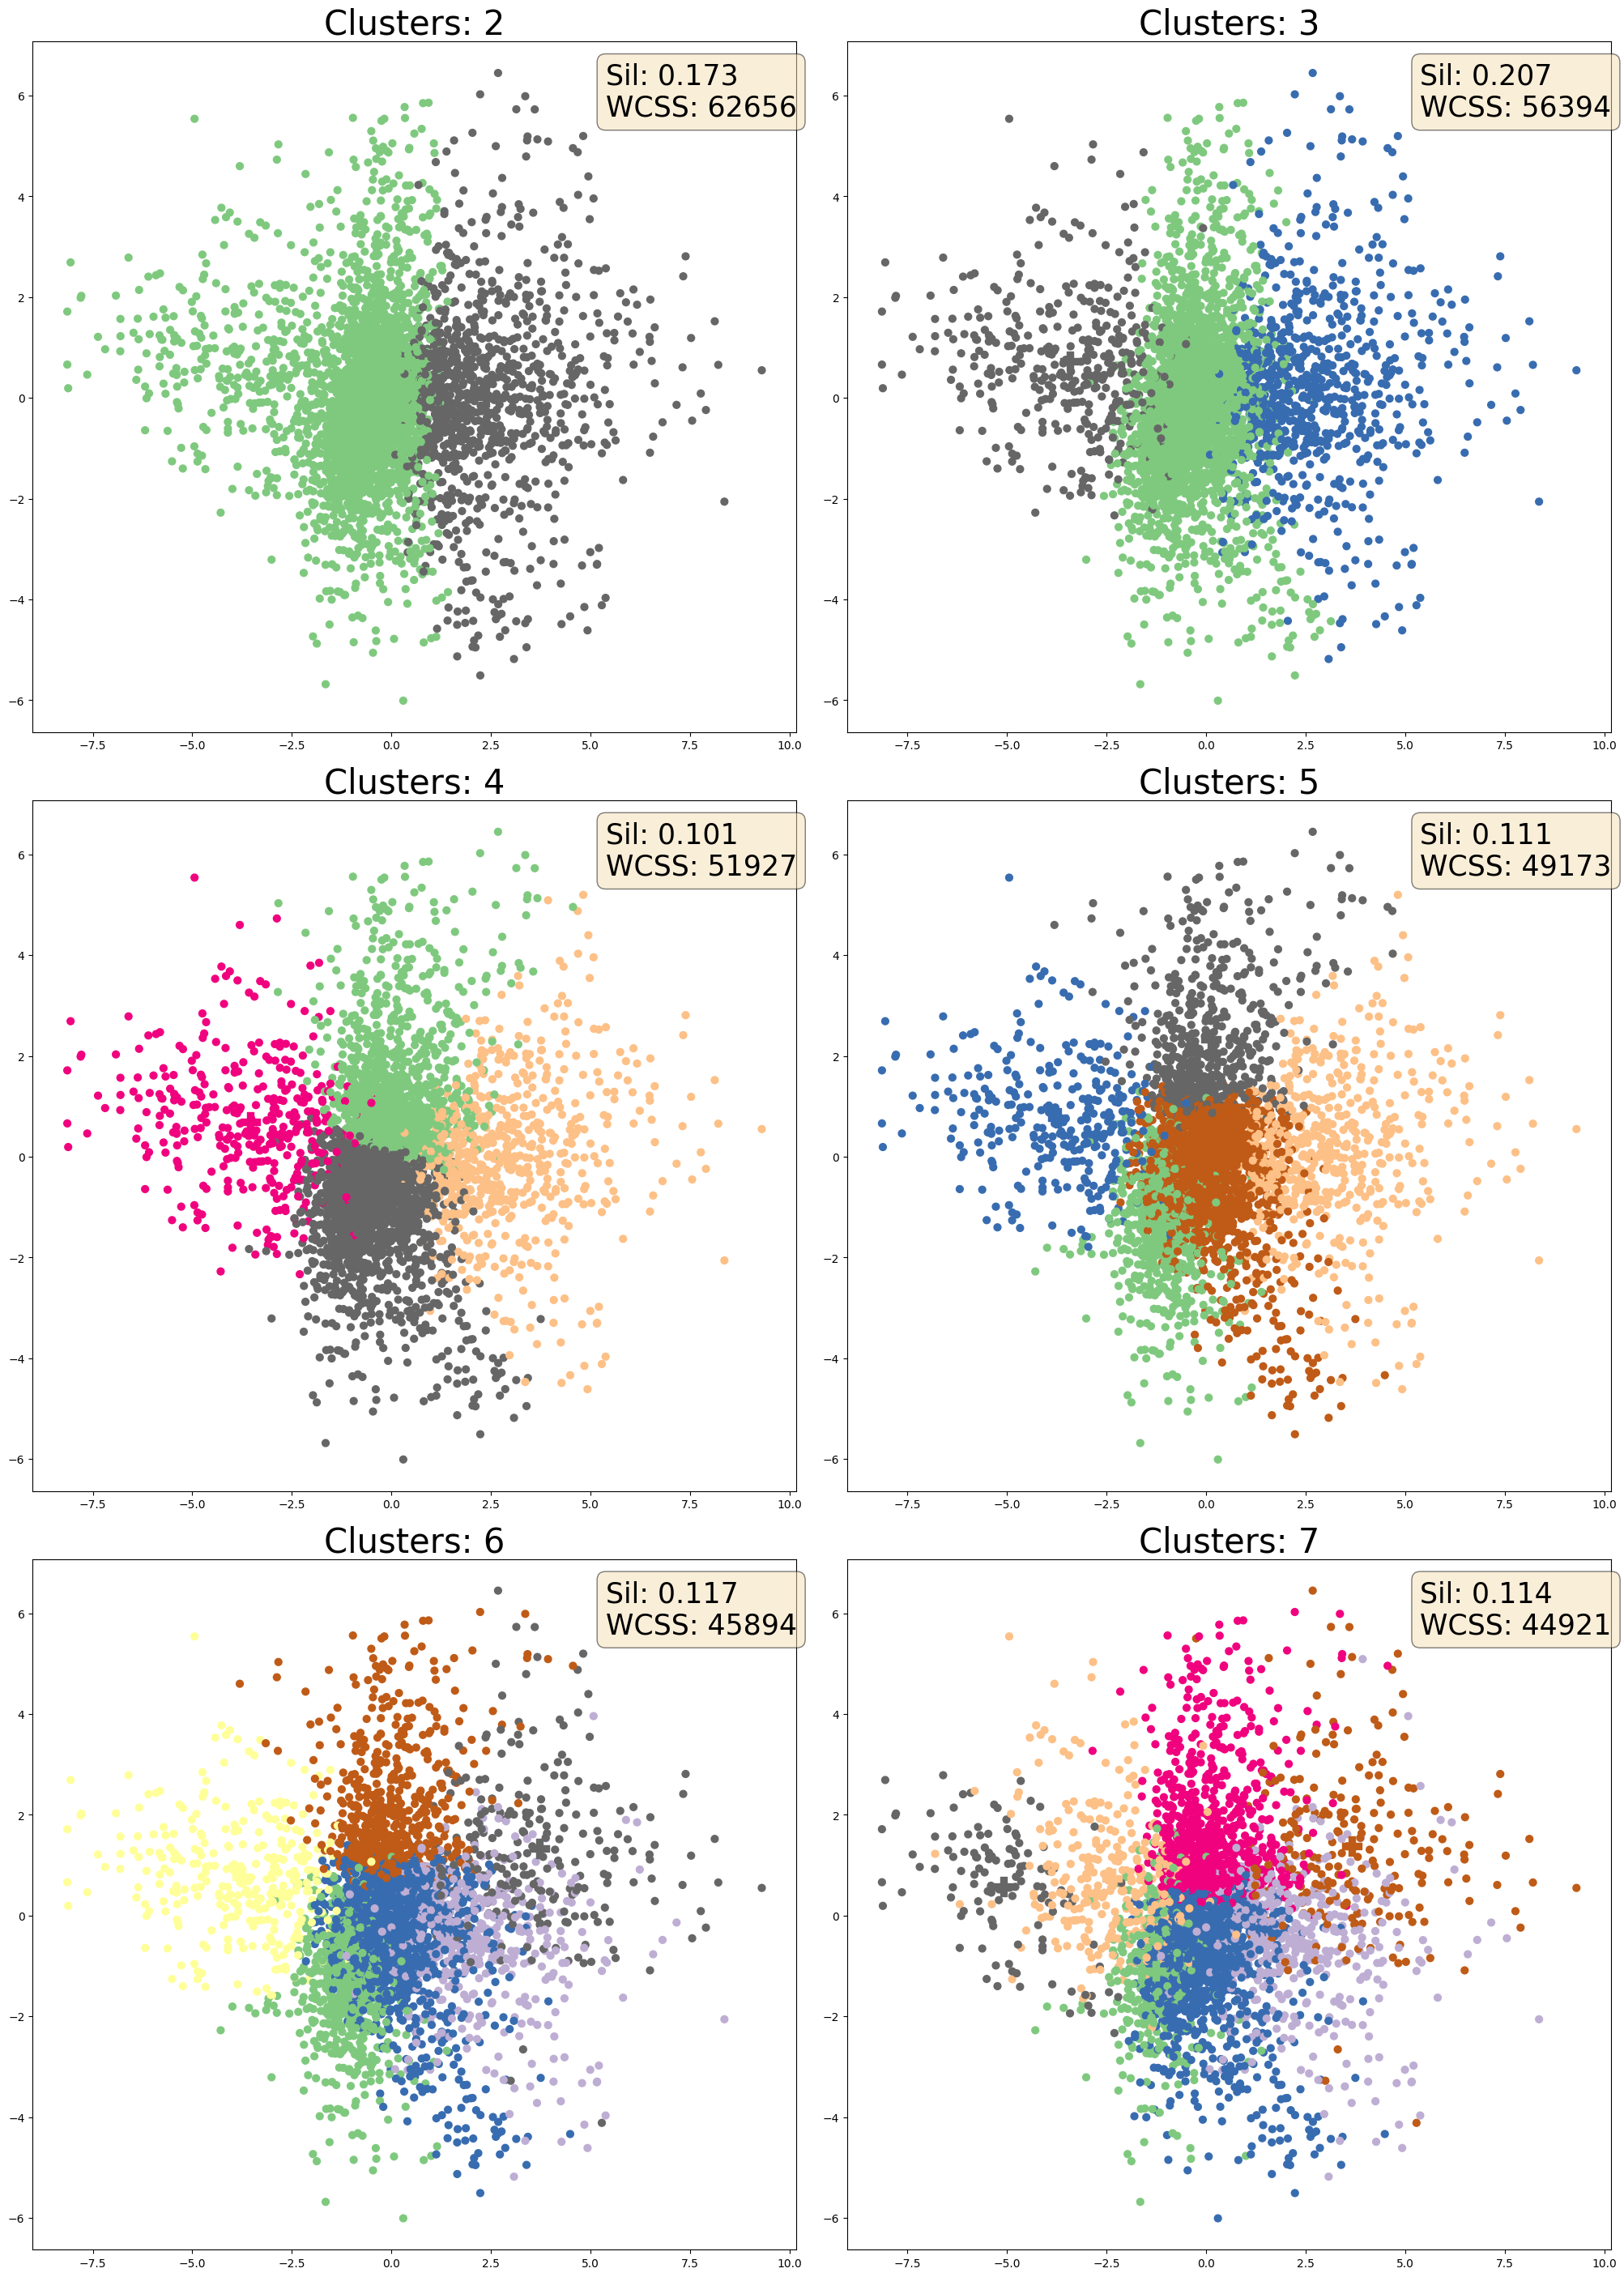

Clusters  Silhouette(max)     WCSS(min)
0         2         0.173150  62656.312737
1         3         0.206841  56394.637467
2         4         0.100779  51927.662069
3         5         0.111479  49173.944173
4         6         0.117497  45894.189174
5         7         0.114488  44921.582601

In [ ]:
# In the next step, we validate the number of clusters i.e. we evaluate clusters on X
max_n_clusters = 7

tab=pd.DataFrame(columns = ['Clusters', 'Silhouette(max)', 'WCSS(min)'], dtype=int).fillna('')
tab['Silhouette(max)']=tab['Silhouette(max)'].astype(float)
label_list={}

fig, ax = plt.subplots(math.ceil((max_n_clusters-1) / 2), 2, figsize=(20,max_n_clusters *4), constrained_layout=True)
ax=ax.flatten()
for i in range(max_n_clusters-1):

    nclust = i + 2
    sil, wcss, label, _ = cluster_kmeans(X, nclust)
    df = pd.DataFrame(data=scores,index=label)
    centroids = df.groupby(level=0).mean().values
    tab = pd.concat([tab, pd.DataFrame([[nclust, sil, wcss]], columns=tab.columns)], ignore_index=True)
    label_list[str(nclust)]=label

    ax[i].scatter(scores[:,0], scores[:,1], c=label, cmap='Accent', s=40)
    ax[i].scatter(centroids[:,0], centroids[:,1], c=range(nclust), cmap='Accent', s=300, marker='P')
    ax[i].set_title('Clusters: ' + str(nclust), fontsize = 30)
    textstr = 'Sil: ' + str(round(sil, 3)) + '\nWCSS: ' + str(int(wcss))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax[i].text(0.75, 0.97, textstr, transform=ax[i].transAxes, fontsize=25,
        verticalalignment='top', bbox=props)

plt.show()
display(tab)


<ipython-input-20-395434e75311>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  ax1.plot(tab.Clusters, tab['Silhouette(max)'], 'bx-', color = 'blue')
<ipython-input-20-395434e75311>:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  ax2.plot(tab.Clusters, tab['WCSS(min)'], 'bx-', color = 'red')


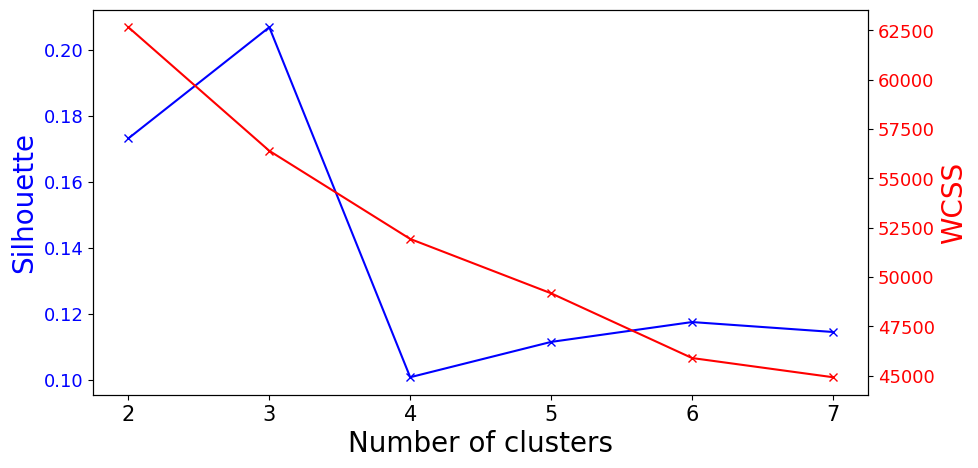

In [ ]:
# Next, we determine optimal number of clusters with Elbow method and the Silhouette coefficinet.
# What would you suggest as the ideal cut-off point?

fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(tab.Clusters, tab['Silhouette(max)'], 'bx-', color = 'blue')
ax1.set_xlabel('Number of clusters', fontsize = 20)
ax1.set_ylabel('Silhouette', fontsize = 20, color = 'blue')
ax1.tick_params(axis="x", labelsize=15)
ax1.tick_params(axis='y', labelcolor='blue', labelsize=13)

ax2 = ax1.twinx()
ax2.plot(tab.Clusters, tab['WCSS(min)'], 'bx-', color = 'red')
ax2.set_ylabel('WCSS', fontsize = 20, color = 'red')
ax2.tick_params(axis='y', labelcolor='red', labelsize=13)

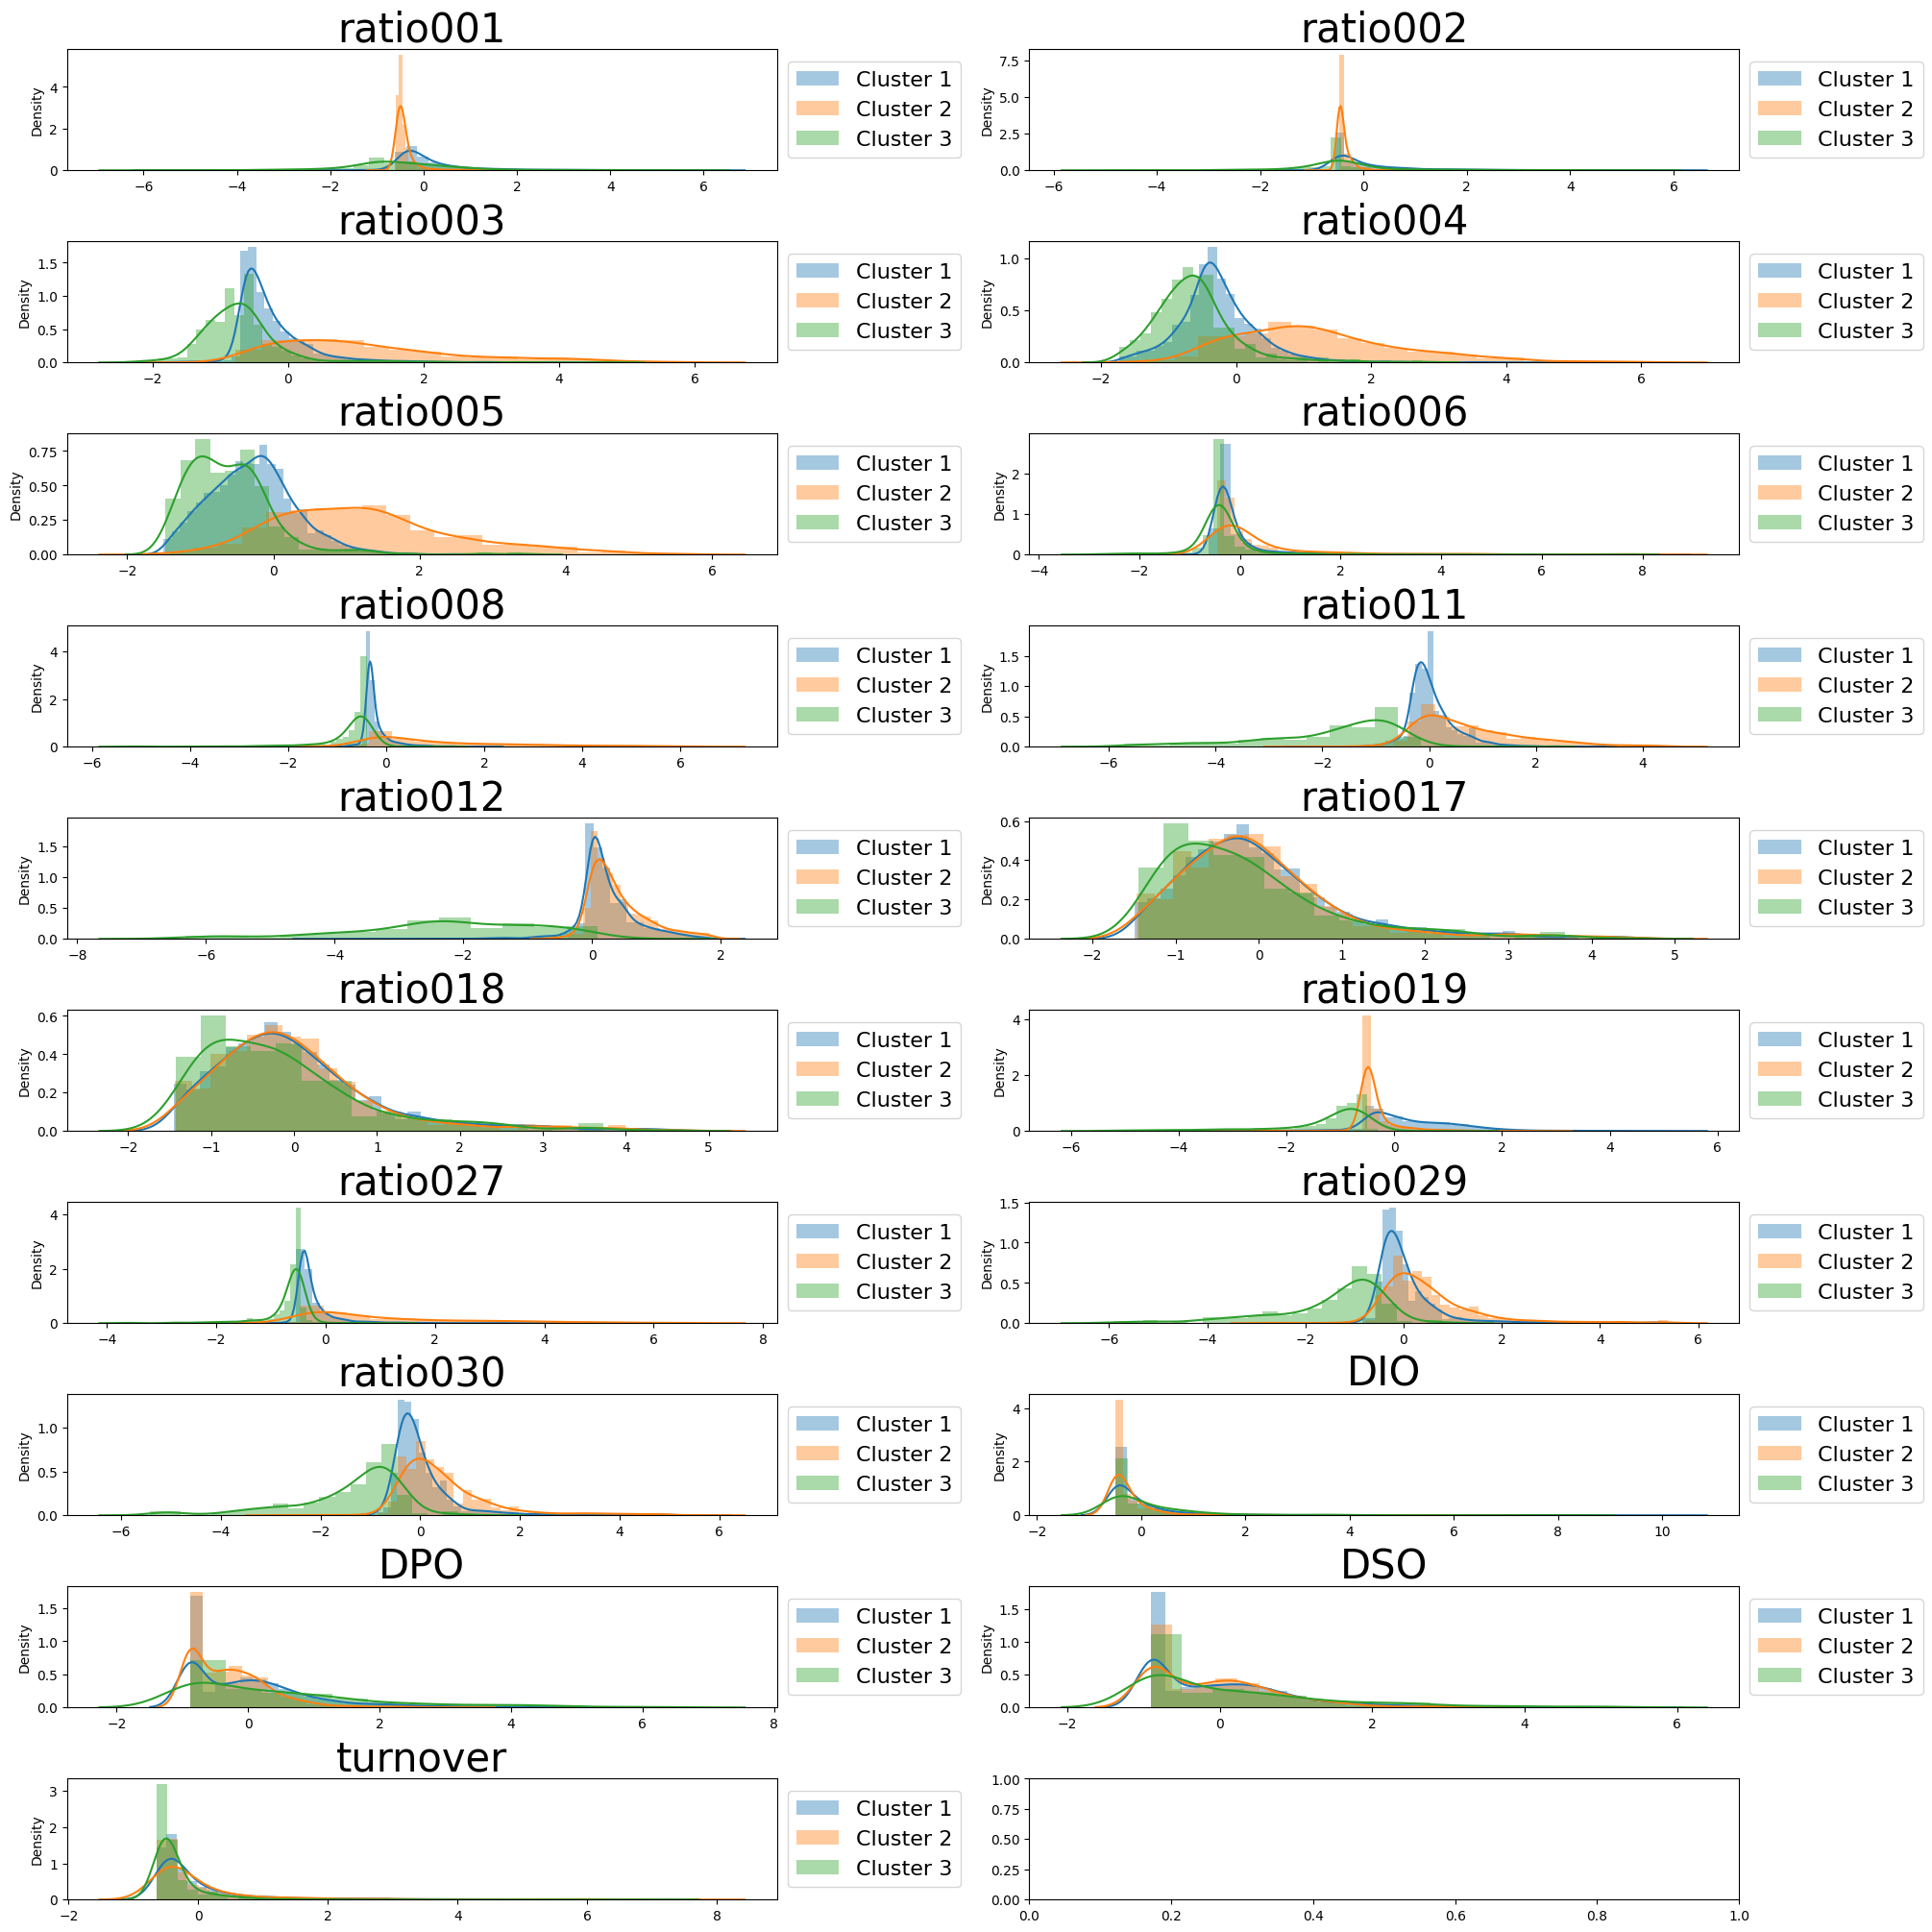

In [ ]:
# In the next step, we inspect the clusters' features. Specifically, we want to check whether there is a significant difference in the distribution of the features amount the clusters.

import warnings
warnings.filterwarnings('ignore')
number_of_clusters = 3


label = label_list[str(number_of_clusters)]
fig, ax = plt.subplots(math.ceil(X.shape[1] / 2), 2, figsize=(20,20), constrained_layout=True)
ax=ax.flatten()
from sklearn import preprocessing
X_labels=pd.DataFrame(data=X.values, index=label, columns=X.columns)
i=0

for var in X_labels.columns:

    for clust in range(number_of_clusters):

        df = X_labels.copy()[X_labels.index == clust]
        sns.distplot(df[var], ax=ax[i], norm_hist=True, label='Cluster ' + str(clust+1), hist_kws=dict(alpha=0.4))
        ax[i].set_title(var, fontsize=30)
        ax[i].set_xlabel('')
        ax[i].legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=16)

    i += 1

In [ ]:
# Next, we run the k-means and create 3 seperate dataset for each of the clusters
kmeans = KMeans(3, random_state=0).fit(X)
label = kmeans.labels_
X["label"] = label
X['status'] = dataset_o.copy().status

In [ ]:
cluster_0 = X[X["label"] == 0]
cluster_1 = X[X["label"] == 1]
cluster_2 = X[X["label"] == 2]

**Training a classifer on the entire dataset vs one for each of the clusters**
In this section, we are going to demonstrate the usefulness of unsupervised learning algorithms and clustering in particular as a pre-modelling step. Specifically, we wil

* Train a logistic regression classifier that predicts whether the company will default on its loan using the full dataset
* Train a seperate model for each of the identified clusters


In [ ]:
# We start with the outlier free datasets containing all observations
dataset_o.describe()

ratio001     ratio002     ratio003     ratio004     ratio005  \
count  3752.000000  3752.000000  3752.000000  3752.000000  3752.000000   
mean      7.197996     1.020149     1.393659     1.427508     1.128204   
std      12.336523     2.200180     0.540149     0.815380     0.751577   
min     -63.710000    -9.420000     0.210000     0.010000     0.000000   
25%       1.500000     0.000000     1.080000     0.970000     0.640000   
50%       3.860000     0.130000     1.210000     1.220000     0.990000   
75%       9.150000     1.190000     1.500000     1.670000     1.390000   
max      84.220000    14.180000     4.450000     6.300000     5.240000   

          ratio006     ratio008     ratio011     ratio012     ratio017  \
count  3752.000000  3752.000000  3752.000000  3752.000000  3752.000000   
mean      5.254459    18.005669     0.042503     0.016692     1.370824   
std      11.275803    46.493622     0.102045     0.509346     0.914645   
min     -26.530000  -223.200000    -0.540000    -3.200000     0.010000   
25%       0.950000     1.450000     0.020000     0.010000     0.750000   
50%       1.710000     3.895000     0.040000     0.080000     1.210000   
75%       4.457500    15.892500     0.080000     0.220000     1.740000   
max     100.360000   299.410000     0.490000     1.080000     5.580000   

          ratio018     ratio019     ratio027     ratio029     ratio030  \
count  3752.000000  3752.000000  3752.000000  3752.000000  3752.000000   
mean      1.330064     0.204046    28.268630     0.075762     0.081946   
std       0.909313     0.376043    59.079722     0.134543     0.148049   
min       0.010000    -1.780000  -191.630000    -0.720000    -0.720000   
25%       0.720000     0.020000     2.900000     0.030000     0.030000   
50%       1.170000     0.120000     7.735000     0.060000     0.060000   
75%       1.700000     0.390000    26.532500     0.110000     0.120000   
max       5.570000     2.170000   406.570000     0.800000     0.930000   

               DIO          DPO          DSO      turnover       status  
count  3752.000000  3752.000000  3752.000000   3752.000000  3752.000000  
mean     67.855544    65.358742    86.480544   2644.707623     0.088220  
std     137.992908    73.751854    95.299238   4090.051189     0.283652  
min       0.000000     0.000000     0.000000      6.000000     0.000000  
25%       1.000000     0.000000     0.000000    637.000000     0.000000  
50%      19.000000    50.000000    68.000000   1175.000000     0.000000  
75%      75.000000    96.000000   134.000000   2759.500000     0.000000  
max    1476.000000   521.000000   607.000000  33500.000000     1.000000

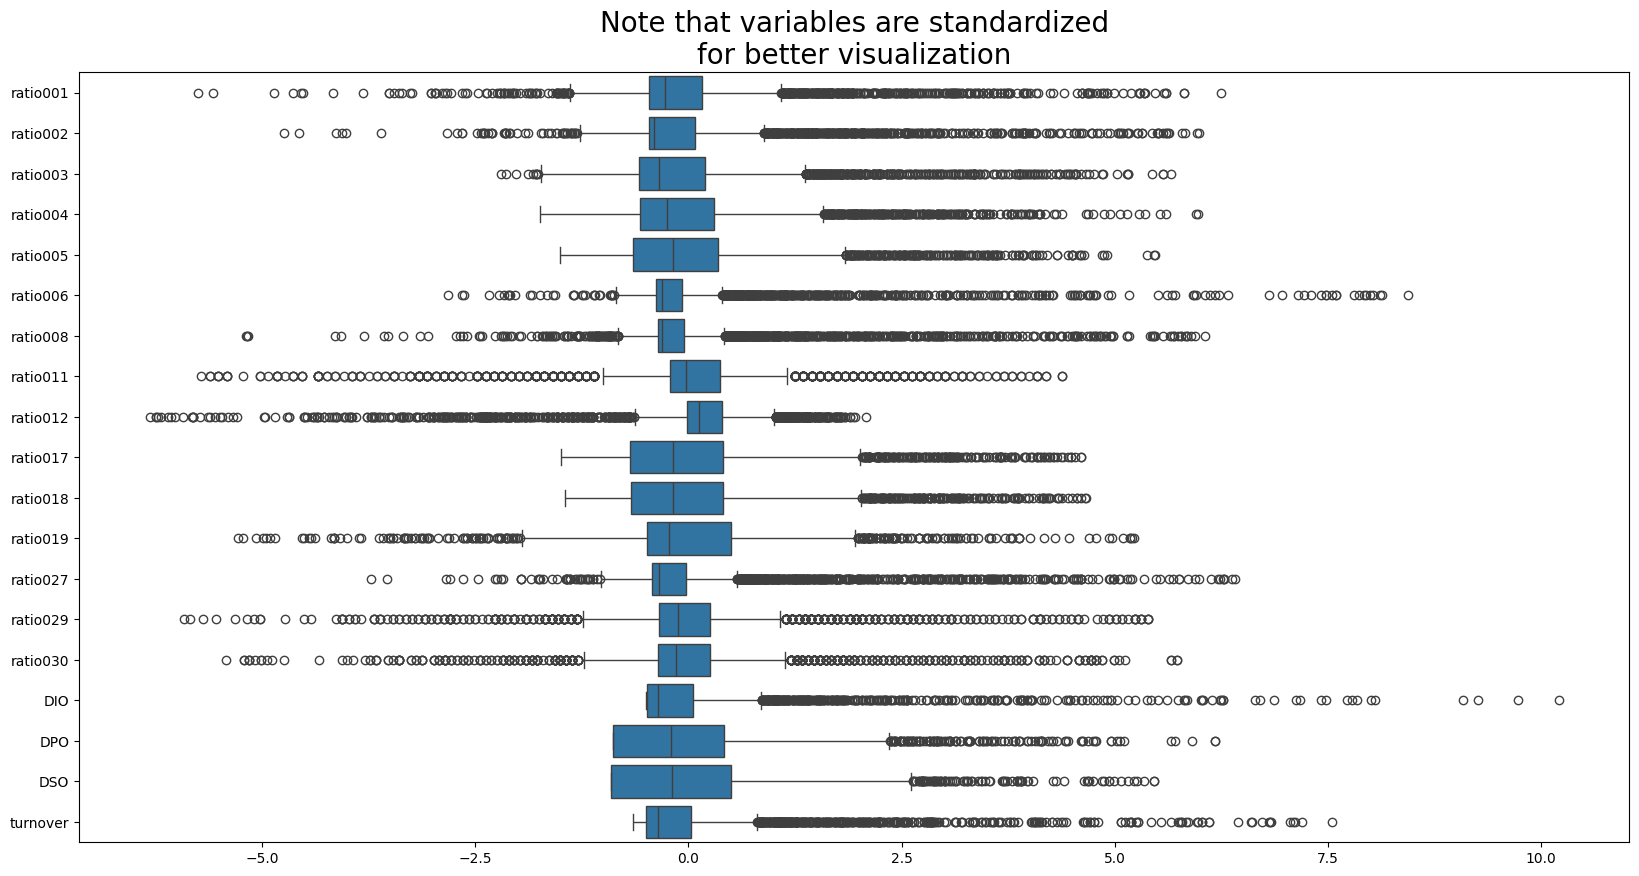

In [ ]:
# As a reminder, we check the dispersion with box plot
box_plot(dataset_o.drop(columns="status"), standardize=True)

<Figure size 1000x1000 with 0 Axes>

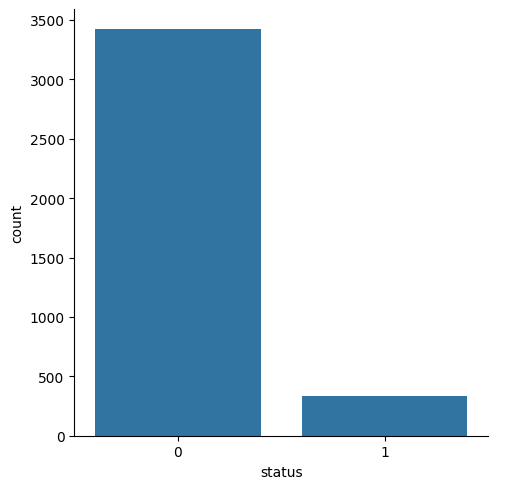

In [ ]:
# Check distribution for target variable
plt.figure(figsize=(10,10))
sns.catplot(x='status', kind="count", data=dataset_o) # categorical plots
plt.show()

In [ ]:
# The dataset is very unbalanced so we remove some observation for y=0 to be equal to 2*size of y=1.
# This is called "undersampling"

# We keep all y=1
from sklearn.model_selection import train_test_split
data_1 = dataset_o[dataset_o['status'] == 1]
print(data_1.shape)

# We take y=0 as double the size of data_1
# Moreover we "stratify" the sampling in order to take the same distribution for each variable
# We use the train_test_split function and we keep the test only
all_data_0 = dataset_o[dataset_o['status'] == 0]
percentage_corresponding_to_double_size = 2*data_1.shape[0] / all_data_0.shape[0] # 2*size_1 compared to size_0

X = all_data_0.drop(columns=['status'])
y = all_data_0['status'].to_frame()

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)
data_0_big, data_0_small = train_test_split(all_data_0, test_size=percentage_corresponding_to_double_size,
                                                    random_state=0, shuffle=True)
print(data_0_big.shape) # remaining from the dataset
print(data_0_small.shape)


(331, 20)
(2759, 20)
(662, 20)


In [ ]:
# We merge the two dataset

dataset=pd.concat([data_1, data_0_small], axis= 0).reset_index(drop=True)  # axis = 1 by column and = 0 by row
print(dataset.shape)

(993, 20)


In [ ]:
# We define X and y and standardise
X = dataset.drop(columns=['status'])
y = dataset['status'].values.reshape(-1,1)
print(X.shape)
print(y.shape)

(993, 19)
(993, 1)


In [ ]:
X = pd.DataFrame(preprocessing.StandardScaler().fit_transform(X.values), columns = X.columns)

In [ ]:
# Split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=dataset.status)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(794, 19)
(199, 19)
(794, 1)
(199, 1)


In [ ]:
# Fit the model on training set
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=0) # solver (https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451)
model.fit(X_train,y_train) # training the algorithm

LogisticRegression(random_state=0)

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.542348
         Iterations 6
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: y                Pseudo R-squared: 0.148     
Date:               2024-11-13 14:18 AIC:              899.2491  
No. Observations:   794              BIC:              988.1137  
Df Model:           18               Log-Likelihood:   -430.62   
Df Residuals:       775              LL-Null:          -505.62   
Converged:          1.0000           LLR p-value:      7.4427e-23
No. Iterations:     6.0000           Scale:            1.0000    
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
ratio001       0.0916    0.0999   0.9177  0.3588  -0.1041   0.2874
ratio002      -0.1070    0.0959  -1.1150  0.2648  -0.2950   0.

In [ ]:
# Get fitted value on testing set
y_test_predicted = model.predict(X_test)

# Compare predictions
display(pd.DataFrame({'True': y_test.flatten(), 'Predicted': y_test_predicted.flatten()}))

# Compare predicted probabilities (default threshold for converting to 0 or 1 is 0.5)
y_test_predicted_prob = model.predict_proba(X_test)[:,1]
display(pd.DataFrame({'True': y_test.flatten(), 'Predicted_prob': y_test_predicted_prob.flatten(), 'Predicted': y_test_predicted.flatten()}))

True  Predicted
0       0          0
1       0          0
2       0          0
3       0          0
4       0          1
..    ...        ...
194     0          0
195     1          1
196     0          0
197     0          0
198     0          0

[199 rows x 2 columns]

True  Predicted_prob  Predicted
0       0        0.040790          0
1       0        0.014812          0
2       0        0.134579          0
3       0        0.429468          0
4       0        0.620336          1
..    ...             ...        ...
194     0        0.085174          0
195     1        0.584952          1
196     0        0.323644          0
197     0        0.115321          0
198     0        0.111028          0

[199 rows x 3 columns]

In [ ]:
# Evaluate confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_predicted)

array([[124,   9],
       [ 39,  27]])

Confusion matrix, without normalization
[[124   9]
 [ 39  27]]


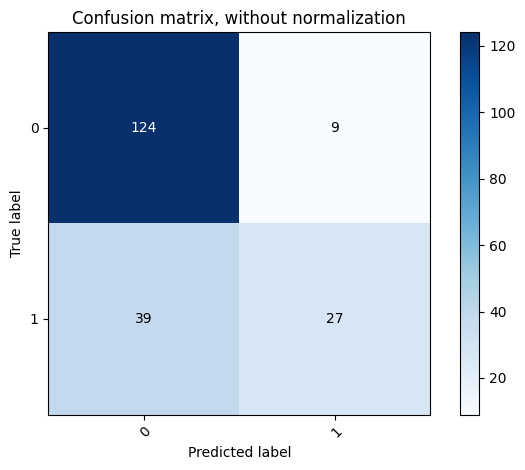

In [ ]:
# Evaluate confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Only use the labels that appear in the data
    classes = ['0', '1']
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_test_predicted)
plt.show()

In [ ]:
# Evaluate precision, recall, F1-score on test set
# A macro-average will compute the metric independently for each class and then take the average (hence treating all classes equally),
# whereas a micro-average will aggregate the contributions of all classes to compute the average metric.
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84       133
           1       0.75      0.41      0.53        66

    accuracy                           0.76       199
   macro avg       0.76      0.67      0.68       199
weighted avg       0.76      0.76      0.74       199



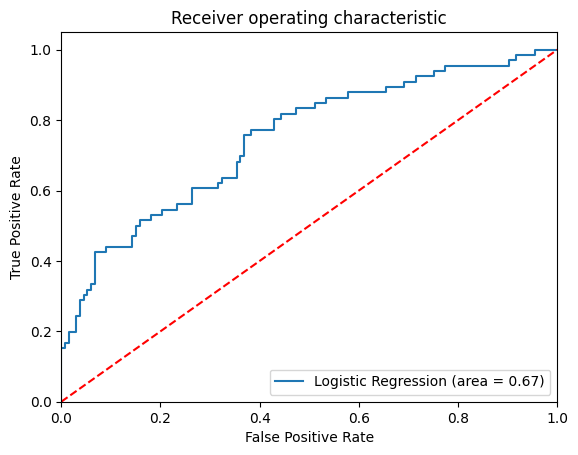

In [ ]:
# Finally, we plot the ROC curve and the corresponding area under the curve.
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, y_test_predicted)
fpr, tpr, thresholds = roc_curve(y_test, y_test_predicted_prob)


plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

**Unsupervised learning as a pre-modelling step**

In the next section, we evaluate a logitic classifer trained seperately on each cluster, starting with "cluster_0"

In [ ]:
# We strat by describing the subset.
cluster_0.describe()

ratio001     ratio002     ratio003     ratio004     ratio005  \
count  2587.000000  2587.000000  2587.000000  2587.000000  2587.000000   
mean      0.193181     0.163052    -0.239881    -0.266441    -0.281632   
std       1.015088     1.061864     0.553485     0.603840     0.588507   
min      -5.577517    -2.382008    -1.784300    -1.738694    -1.501316   
25%      -0.364657    -0.463728    -0.580768    -0.573438    -0.689581   
50%      -0.142522    -0.268263    -0.414125    -0.328121    -0.290367   
75%       0.336201     0.331767    -0.080839     0.003057     0.068926   
max       6.244245     5.982057     4.196329     4.872599     3.196104   

          ratio006     ratio008     ratio011     ratio012     ratio017  ...  \
count  2587.000000  2587.000000  2587.000000  2587.000000  2587.000000  ...   
mean     -0.072273    -0.218500     0.050674     0.220156     0.025458  ...   
std       0.809212     0.313850     0.459411     0.457526     0.999248  ...   
min      -2.089217    -1.991413    -2.376741    -4.352613    -1.488015  ...   
25%      -0.383568    -0.351830    -0.220546     0.006495    -0.646046  ...   
50%      -0.326802    -0.313755    -0.024528     0.143944    -0.164920  ...   
75%      -0.136102    -0.189851     0.269498     0.399207     0.425551  ...   
max       8.435605     2.180253     3.209764     2.087870     4.602592  ...   

          ratio019     ratio027     ratio029     ratio030          DIO  \
count  2587.000000  2587.000000  2587.000000  2587.000000  2587.000000   
mean      0.309269    -0.227052     0.066098     0.070000     0.028054   
std       0.919513     0.424483     0.742187     0.779723     1.044913   
min      -3.521468    -1.423498    -1.380874    -1.296674    -0.491798   
25%      -0.329916    -0.422936    -0.340176    -0.350915    -0.484550   
50%       0.095625    -0.365633    -0.117170    -0.148252    -0.332348   
75%       0.840320    -0.197279     0.180173     0.155742     0.080772   
max       5.228705     5.942278     5.383660     5.728968    10.205830   

               DPO          DSO     turnover   label       status  
count  2587.000000  2587.000000  2587.000000  2587.0  2216.000000  
mean      0.017901    -0.009449     0.032408     0.0     0.088448  
std       0.967309     0.976109     1.008031     0.0     0.284009  
min      -0.886316    -0.907584    -0.645239     0.0     0.000000  
25%      -0.886316    -0.907584    -0.478715     0.0     0.000000  
50%      -0.140473    -0.204442    -0.336889     0.0     0.000000  
75%       0.469763     0.498701     0.064505     0.0     0.000000  
max       5.663545     5.462676     7.107287     0.0     1.000000  

[8 rows x 21 columns]

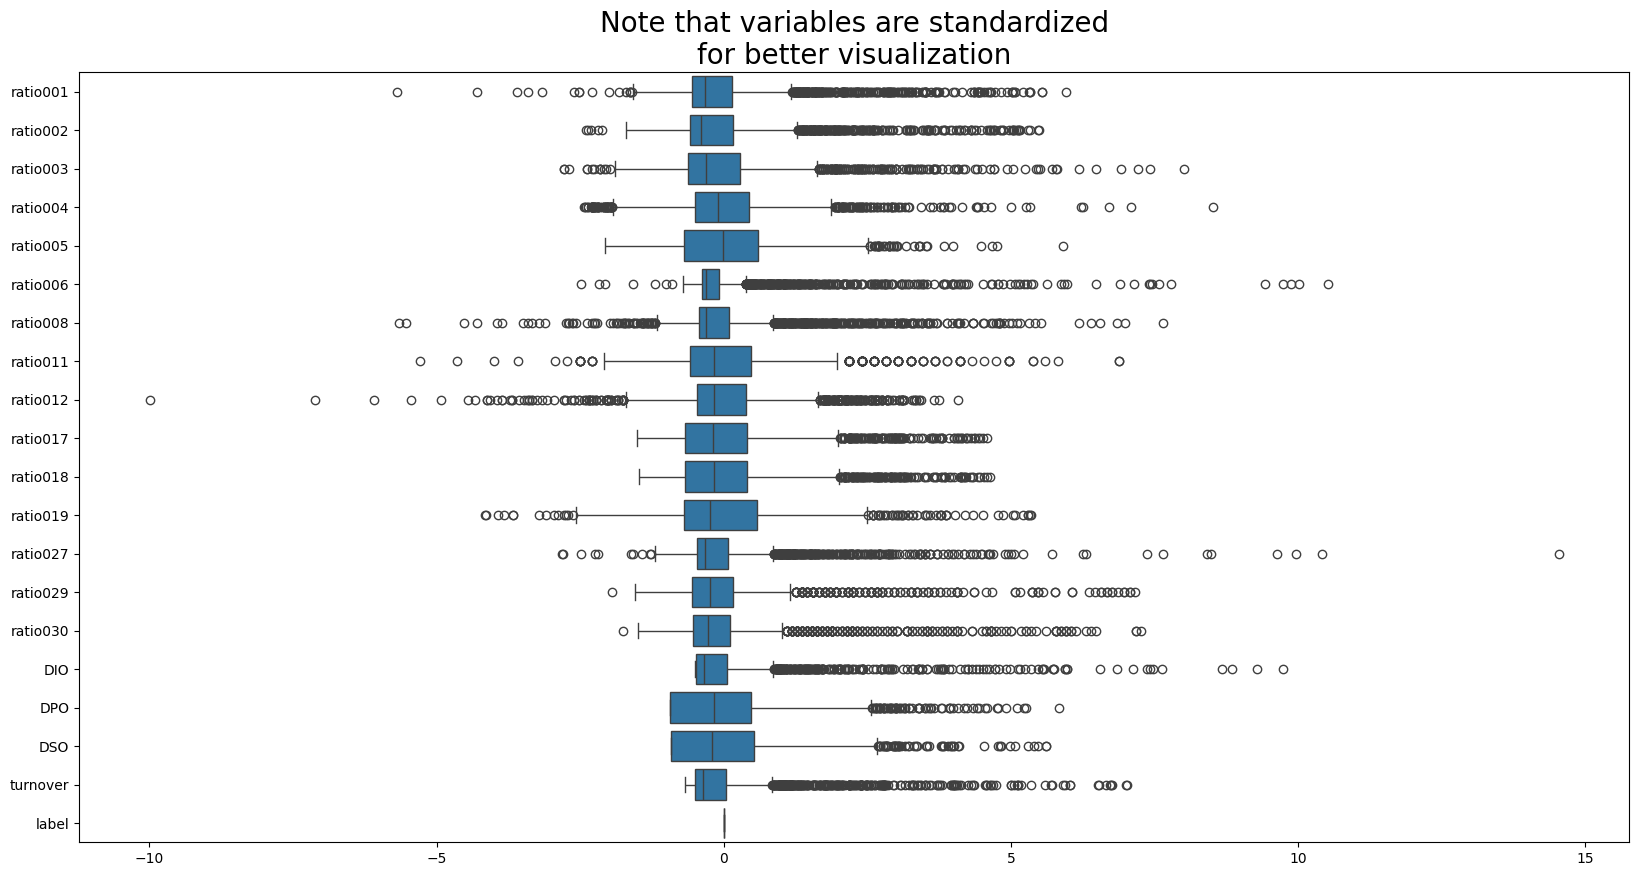

In [ ]:
# Check dispersion with box plot
box_plot(cluster_0.drop(columns="status"), standardize=True)

<Figure size 1000x1000 with 0 Axes>

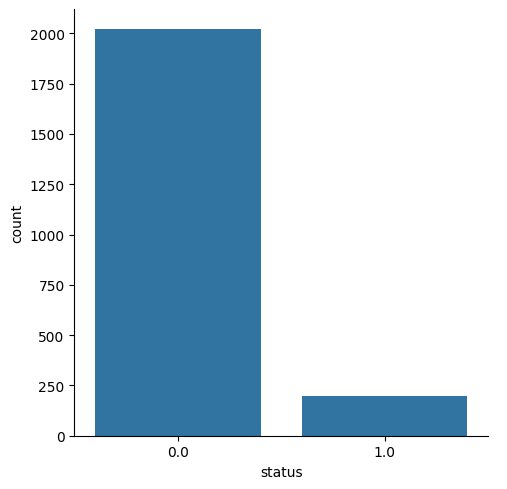

In [ ]:
# Check distribution for target variable
plt.figure(figsize=(10,10))
sns.catplot(x='status', kind="count", data=cluster_0) # categorical plots
plt.show()

In [ ]:
# Similarly as before, the subsample is very unbalanced so we remove some observation for y=0 to be equal to 2*size of y=1.
# We keep all y=1
from sklearn.model_selection import train_test_split
data_1 = cluster_0[cluster_0['status'] == 1]
print(data_1.shape)

# We take y=0 as double the size of data_1
# Moreover we "stratify" the sampling in order to take the same distribution for each variable
# We use the train_test_split function and we keep the test only
all_data_0 = cluster_0[cluster_0['status'] == 0]
percentage_corresponding_to_double_size = 2*data_1.shape[0] / all_data_0.shape[0] # 2*size_1 compared to size_0

X = all_data_0.drop(columns=['status'])
y = all_data_0['status'].to_frame()

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)
data_0_big, data_0_small = train_test_split(all_data_0, test_size=percentage_corresponding_to_double_size,
                                                    random_state=0, shuffle=True)
print(data_0_big.shape) # remaining from the dataset
print(data_0_small.shape)

(196, 21)
(1628, 21)
(392, 21)


In [ ]:
# We merge the two dataset
dataset=pd.concat([data_1, data_0_small], axis= 0).reset_index(drop=True)  # axis = 1 by column and = 0 by row
print(dataset.shape)

(588, 21)


<Figure size 1000x1000 with 0 Axes>

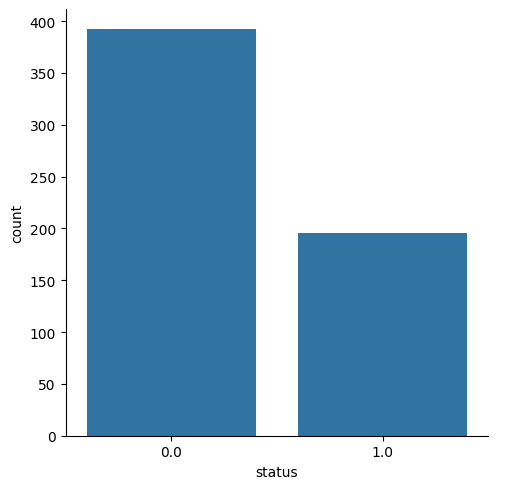

In [ ]:
# We check distribution for target variable after downsampling

plt.figure(figsize=(10,10))
sns.catplot(x='status', kind="count", data=dataset)
plt.show()

In [ ]:
# We define X and y and strandardize
X = dataset.drop(columns=['status'])
y = dataset['status'].values.reshape(-1,1)
print(X.shape)
print(y.shape)

(588, 20)
(588, 1)


In [ ]:
X = pd.DataFrame(preprocessing.StandardScaler().fit_transform(X.values), columns = X.columns)

In [ ]:
# Split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=dataset.status)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(470, 20)
(118, 20)
(470, 1)
(118, 1)


In [ ]:
# Fit the model on training set
model = LogisticRegression(solver='lbfgs', random_state=0) # solver (https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451)
model.fit(X_train,y_train) # training the algorithm

LogisticRegression(random_state=0)

In [ ]:
# Get fitted value on test set
y_test_predicted = model.predict(X_test)

# Compare predictions
display(pd.DataFrame({'True': y_test.flatten(), 'Predicted': y_test_predicted.flatten()}))

# Compare predicted probabilities (default threshold for converting to 0 or 1 is 0.5)
y_test_predicted_prob = model.predict_proba(X_test)[:,1]
display(pd.DataFrame({'True': y_test.flatten(), 'Predicted_prob': y_test_predicted_prob.flatten(), 'Predicted': y_test_predicted.flatten()}))

True  Predicted
0     1.0        1.0
1     1.0        1.0
2     0.0        0.0
3     0.0        0.0
4     0.0        0.0
..    ...        ...
113   0.0        0.0
114   0.0        0.0
115   1.0        0.0
116   1.0        1.0
117   1.0        1.0

[118 rows x 2 columns]

True  Predicted_prob  Predicted
0     1.0        0.964349        1.0
1     1.0        0.784770        1.0
2     0.0        0.198586        0.0
3     0.0        0.418054        0.0
4     0.0        0.266721        0.0
..    ...             ...        ...
113   0.0        0.169584        0.0
114   0.0        0.136220        0.0
115   1.0        0.452932        0.0
116   1.0        0.548034        1.0
117   1.0        0.532932        1.0

[118 rows x 3 columns]

In [ ]:
# Evaluate confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_predicted)

array([[72,  7],
       [19, 20]])

Confusion matrix, without normalization
[[72  7]
 [19 20]]


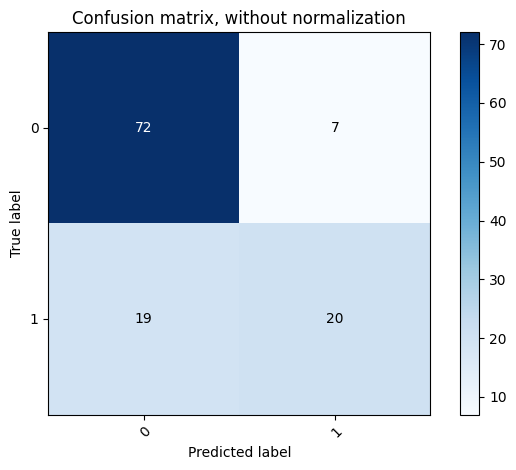

In [ ]:
# Evaluate confusion matrix
plot_confusion_matrix(y_test, y_test_predicted)
plt.show()

In [ ]:
# Evaluate precision, recall, F1-score on test set
# A macro-average will compute the metric independently for each class and then take the average (hence treating all classes equally),
# whereas a micro-average will aggregate the contributions of all classes to compute the average metric.
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

         0.0       0.79      0.91      0.85        79
         1.0       0.74      0.51      0.61        39

    accuracy                           0.78       118
   macro avg       0.77      0.71      0.73       118
weighted avg       0.77      0.78      0.77       118



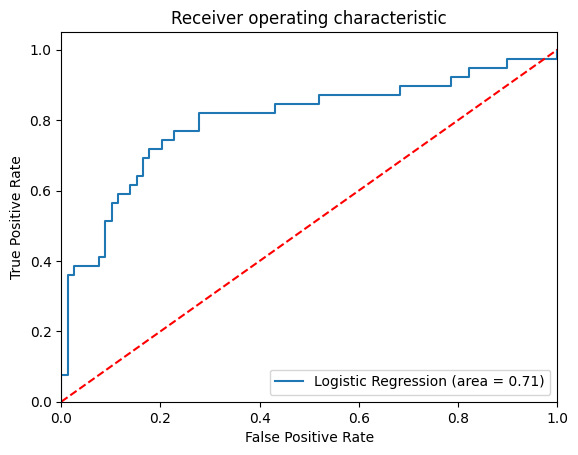

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, y_test_predicted)
fpr, tpr, thresholds = roc_curve(y_test, y_test_predicted_prob)


plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()



**Cluster_1: ML model**

In [ ]:
cluster_1.describe()

ratio001    ratio002    ratio003    ratio004    ratio005    ratio006  \
count  775.000000  775.000000  775.000000  775.000000  775.000000  775.000000   
mean    -0.385797   -0.373078    1.150073    1.201723    1.246788    0.411966   
std      0.359119    0.247258    1.360684    1.254364    1.224588    1.446445   
min     -0.937017   -0.941025   -1.154760   -1.591504   -1.408166   -0.443882   
25%     -0.525177   -0.463728    0.104320    0.266772    0.348376   -0.301523   
50%     -0.489506   -0.459182    0.863471    1.008856    1.106883   -0.157390   
75%     -0.406003   -0.368269    1.863328    1.891997    1.878697    0.382333   
max      2.482554    3.800127    5.659084    5.976525    5.471624    8.134034   

         ratio008    ratio011    ratio012    ratio017  ...    ratio019  \
count  775.000000  775.000000  775.000000  775.000000  ...  775.000000   
mean     1.121258    0.747781    0.395609   -0.005444  ...   -0.384172   
std      1.589973    1.029083    0.444706    0.988517  ...    0.477565   
min     -2.172968   -2.278732   -0.602210   -1.466145  ...   -5.064052   
25%     -0.124349   -0.024528    0.065401   -0.640578  ...   -0.516090   
50%      0.540239    0.465516    0.261758   -0.164920  ...   -0.489493   
75%      1.996332    1.249587    0.605381    0.381813  ...   -0.383108   
max      6.053343    4.385870    1.950421    4.602592  ...    2.914829   

         ratio027    ratio029    ratio030         DIO         DPO         DSO  \
count  775.000000  775.000000  775.000000  775.000000  775.000000  775.000000   
mean     1.097858    0.508975    0.473944   -0.181474   -0.293176   -0.042648   
std      1.591141    1.000715    0.976997    0.707148    0.615626    0.907274   
min     -0.901421   -2.718913   -2.715314   -0.491798   -0.886316   -0.907584   
25%     -0.112467   -0.117170   -0.148252   -0.491798   -0.886316   -0.907584   
50%      0.492136    0.254508    0.257073   -0.412073   -0.398128   -0.162463   
75%      1.902198    0.774857    0.729953   -0.165650    0.035818    0.404249   
max      6.404089    5.383660    5.728968    6.697936    3.263285    5.074373   

         turnover  label      status  
count  775.000000  775.0  664.000000  
mean     0.053622    1.0    0.061747  
std      1.111442    0.0    0.240877  
min     -0.642549    1.0    0.000000  
25%     -0.484461    1.0    0.000000  
50%     -0.349849    1.0    0.000000  
75%      0.068173    1.0    0.000000  
max      7.544992    1.0    1.000000  

[8 rows x 21 columns]

In [ ]:
cluster_1.shape

(775, 21)

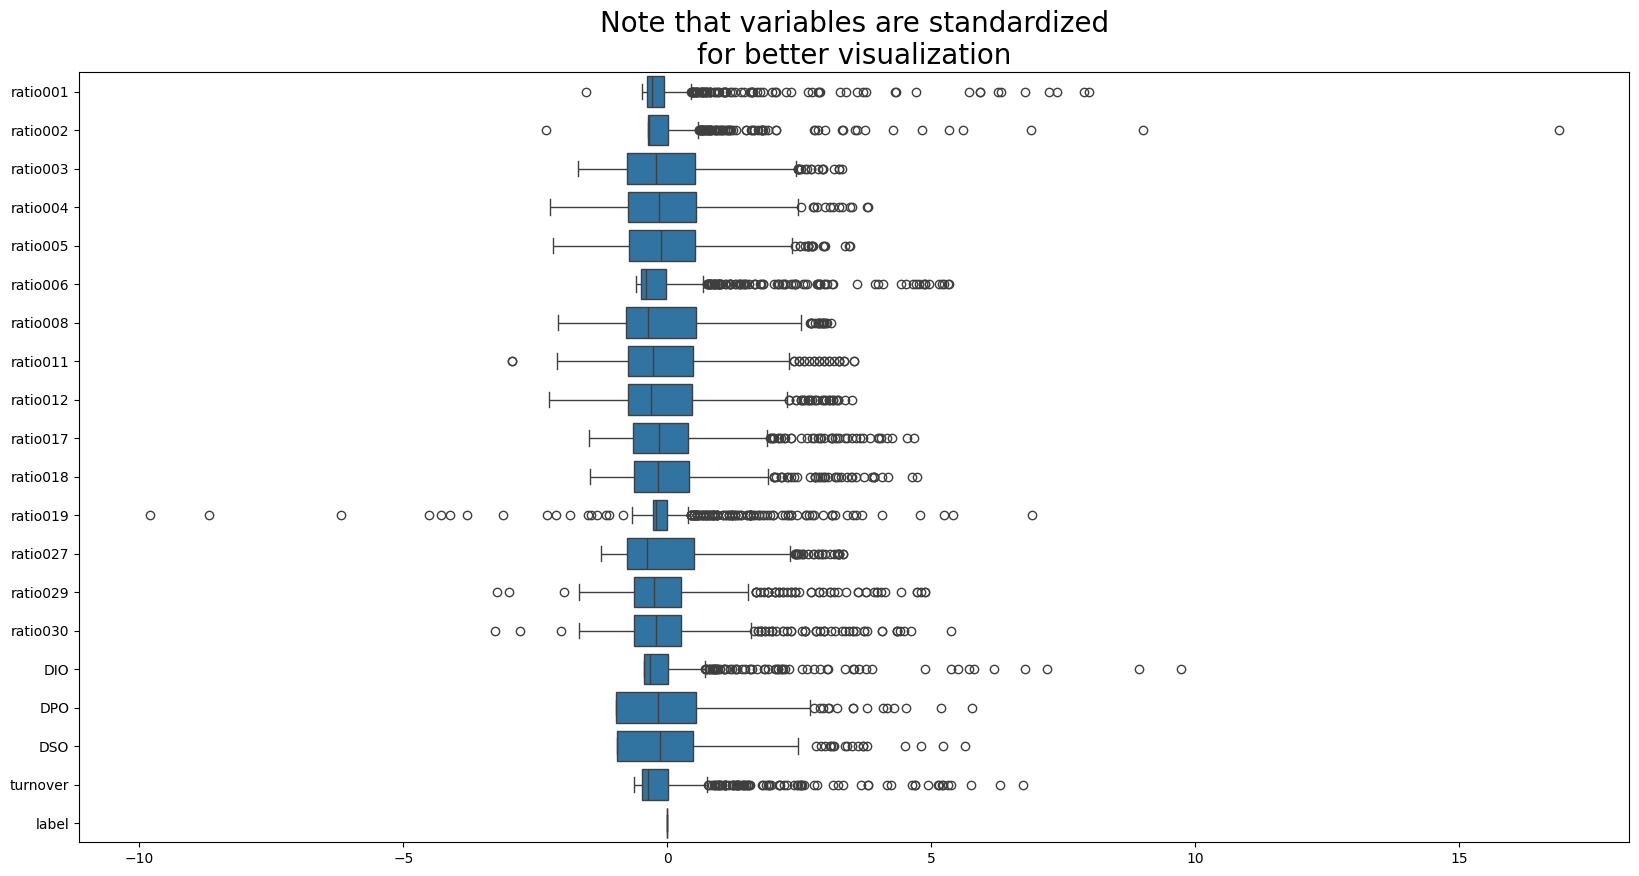

In [ ]:
# Check dispersion with box plot
box_plot(cluster_1.drop(columns="status"), standardize=True)

<Figure size 1000x1000 with 0 Axes>

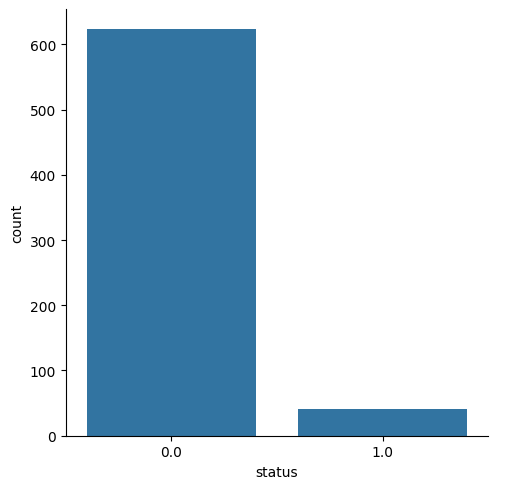

In [ ]:
# Check distribution for target variable
plt.figure(figsize=(10,10))
sns.catplot(x='status', kind="count", data=cluster_1) # categorical plots
plt.show()

In [ ]:
# Dataset is very unbalanced so we remove some observation for y=0 to be equal to 2*size of y=1.
# We keep all y=1
from sklearn.model_selection import train_test_split
data_1 = cluster_1[cluster_1['status'] == 1]
print(data_1.shape)

# We take y=0 as double the size of data_1
# Moreover we "stratify" the sampling in order to take the same distribution for each variable
# We use the train_test_split function and we keep the test only
all_data_0 = cluster_1[cluster_1['status'] == 0]
percentage_corresponding_to_double_size = 2*data_1.shape[0] / all_data_0.shape[0] # 2*size_1 compared to size_0

X = all_data_0.drop(columns=['status'])
y = all_data_0['status'].to_frame()

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)
data_0_big, data_0_small = train_test_split(all_data_0, test_size=percentage_corresponding_to_double_size,
                                                    random_state=0, shuffle=True)
print(data_0_big.shape) # remaining from the dataset
print(data_0_small.shape)

(41, 21)
(541, 21)
(82, 21)


In [ ]:
# Merge two dataset

dataset=pd.concat([data_1, data_0_small], axis= 0).reset_index(drop=True)  # axis = 1 by column and = 0 by row
print(dataset.shape)

(123, 21)


<Figure size 1000x1000 with 0 Axes>

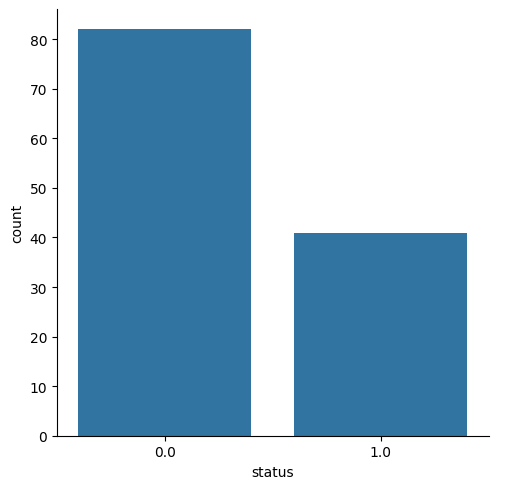

In [ ]:
# Check distribution for target variable after downsampling

plt.figure(figsize=(10,10))
sns.catplot(x='status', kind="count", data=dataset)
plt.show()

In [ ]:
X = dataset.drop(columns=['status'])
y = dataset['status'].values.reshape(-1,1)
print(X.shape)
print(y.shape)

(123, 20)
(123, 1)


In [ ]:
X = pd.DataFrame(preprocessing.StandardScaler().fit_transform(X.values), columns = X.columns)

In [ ]:
# Split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=dataset.status)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(98, 20)
(25, 20)
(98, 1)
(25, 1)


In [ ]:
# Fit the model on training set
model = LogisticRegression(solver='lbfgs', random_state=0) # solver (https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451)
model.fit(X_train,y_train) # training the algorithm

LogisticRegression(random_state=0)

In [ ]:
# Get fitted value on test set
y_test_predicted = model.predict(X_test)

# Compare predictions
display(pd.DataFrame({'True': y_test.flatten(), 'Predicted': y_test_predicted.flatten()}))

# Compare predicted probabilities (default threshold for converting to 0 or 1 is 0.5)
y_test_predicted_prob = model.predict_proba(X_test)[:,1]
display(pd.DataFrame({'True': y_test.flatten(), 'Predicted_prob': y_test_predicted_prob.flatten(), 'Predicted': y_test_predicted.flatten()}))

True  Predicted
0    0.0        1.0
1    1.0        1.0
2    0.0        0.0
3    0.0        0.0
4    0.0        0.0
5    0.0        0.0
6    0.0        0.0
7    0.0        0.0
8    0.0        1.0
9    0.0        0.0
10   0.0        0.0
11   0.0        0.0
12   1.0        0.0
13   1.0        1.0
14   0.0        0.0
15   0.0        0.0
16   0.0        0.0
17   0.0        0.0
18   1.0        1.0
19   0.0        0.0
20   0.0        0.0
21   1.0        1.0
22   1.0        1.0
23   1.0        1.0
24   1.0        0.0

True  Predicted_prob  Predicted
0    0.0        0.990736        1.0
1    1.0        0.986038        1.0
2    0.0        0.071927        0.0
3    0.0        0.260236        0.0
4    0.0        0.315177        0.0
5    0.0        0.025590        0.0
6    0.0        0.048703        0.0
7    0.0        0.110724        0.0
8    0.0        0.675551        1.0
9    0.0        0.092212        0.0
10   0.0        0.463976        0.0
11   0.0        0.123281        0.0
12   1.0        0.233276        0.0
13   1.0        0.998227        1.0
14   0.0        0.338692        0.0
15   0.0        0.214966        0.0
16   0.0        0.084190        0.0
17   0.0        0.454812        0.0
18   1.0        0.986723        1.0
19   0.0        0.032491        0.0
20   0.0        0.027005        0.0
21   1.0        0.999827        1.0
22   1.0        0.852101        1.0
23   1.0        0.998607        1.0
24   1.0        0.303340        0.0

Confusion matrix, without normalization
[[15  2]
 [ 2  6]]


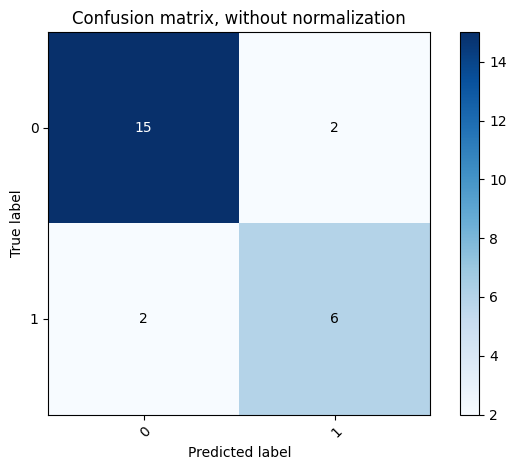

In [ ]:
# Evaluate confusion matrix
plot_confusion_matrix(y_test, y_test_predicted)
plt.show()

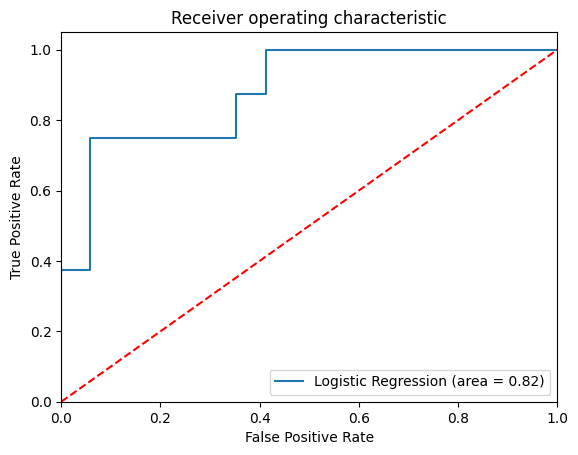

In [ ]:
# Plot the ROC curve and the corresponding AUC value.
logit_roc_auc = roc_auc_score(y_test, y_test_predicted)
fpr, tpr, thresholds = roc_curve(y_test, y_test_predicted_prob)


plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

**Cluster_2: ML model**

In [ ]:
cluster_2.describe()

ratio001    ratio002    ratio003    ratio004    ratio005    ratio006  \
count  390.000000  390.000000  390.000000  390.000000  390.000000  390.000000   
mean    -0.514788   -0.340202   -0.694190   -0.620646   -0.609431   -0.339240   
std      1.314648    1.207344    0.651056    0.595965    0.601836    0.800603   
min     -5.748577   -4.745766   -2.191650   -1.726428   -1.474702   -2.819196   
25%     -1.077067   -0.680785   -1.043665   -0.978211   -1.045547   -0.490448   
50%     -0.717721   -0.463728   -0.765927   -0.665432   -0.689581   -0.406629   
75%      0.119337   -0.201215   -0.525220   -0.401716   -0.303674   -0.341437   
max      5.355708    5.041100    4.659226    2.762873    3.395711    7.599189   

         ratio008    ratio011    ratio012    ratio017  ...    ratio019  \
count  390.000000  390.000000  390.000000  390.000000  ...  390.000000   
mean    -0.778756   -1.822111   -2.246517   -0.158051  ...   -1.288063   
std      0.728093    1.294330    1.471804    1.016726  ...    0.988535   
min     -5.188622   -5.709042   -6.316175   -1.444276  ...   -5.276822   
25%     -0.774955   -2.474750   -2.978120   -0.897543  ...   -1.393766   
50%     -0.524672   -1.445657   -2.182877   -0.372679  ...   -0.915034   
75%     -0.448415   -0.906608   -1.137280    0.245129  ...   -0.675667   
max      0.953039    1.543613    0.575928    4.285487  ...    1.026494   

         ratio027    ratio029    ratio030         DIO         DPO         DSO  \
count  390.000000  390.000000  390.000000  390.000000  390.000000  390.000000   
mean    -0.675527   -1.449872   -1.406147    0.174528    0.463852    0.147425   
std      0.456436    1.156758    1.114417    1.136010    1.510562    1.283526   
min     -3.722562   -5.915341   -5.417484   -0.491798   -0.886316   -0.907584   
25%     -0.682916   -1.826887   -1.837108   -0.477302   -0.886316   -0.907584   
50%     -0.546769   -1.083532   -1.026457   -0.263495    0.056159   -0.298894   
75%     -0.494671   -0.711854   -0.688686    0.397859    1.103730    0.682357   
max      1.235468    0.774857    1.067725    8.053259    6.178855    5.221299   

         turnover  label      status  
count  390.000000  390.0  300.000000  
mean    -0.321527    2.0    0.313333  
std      0.562102    0.0    0.464624  
min     -0.635947    2.0    0.000000  
25%     -0.545532    2.0    0.000000  
50%     -0.477125    2.0    0.000000  
75%     -0.333221    2.0    1.000000  
max      7.192383    2.0    1.000000  

[8 rows x 21 columns]

In [ ]:
cluster_2.shape

(390, 21)

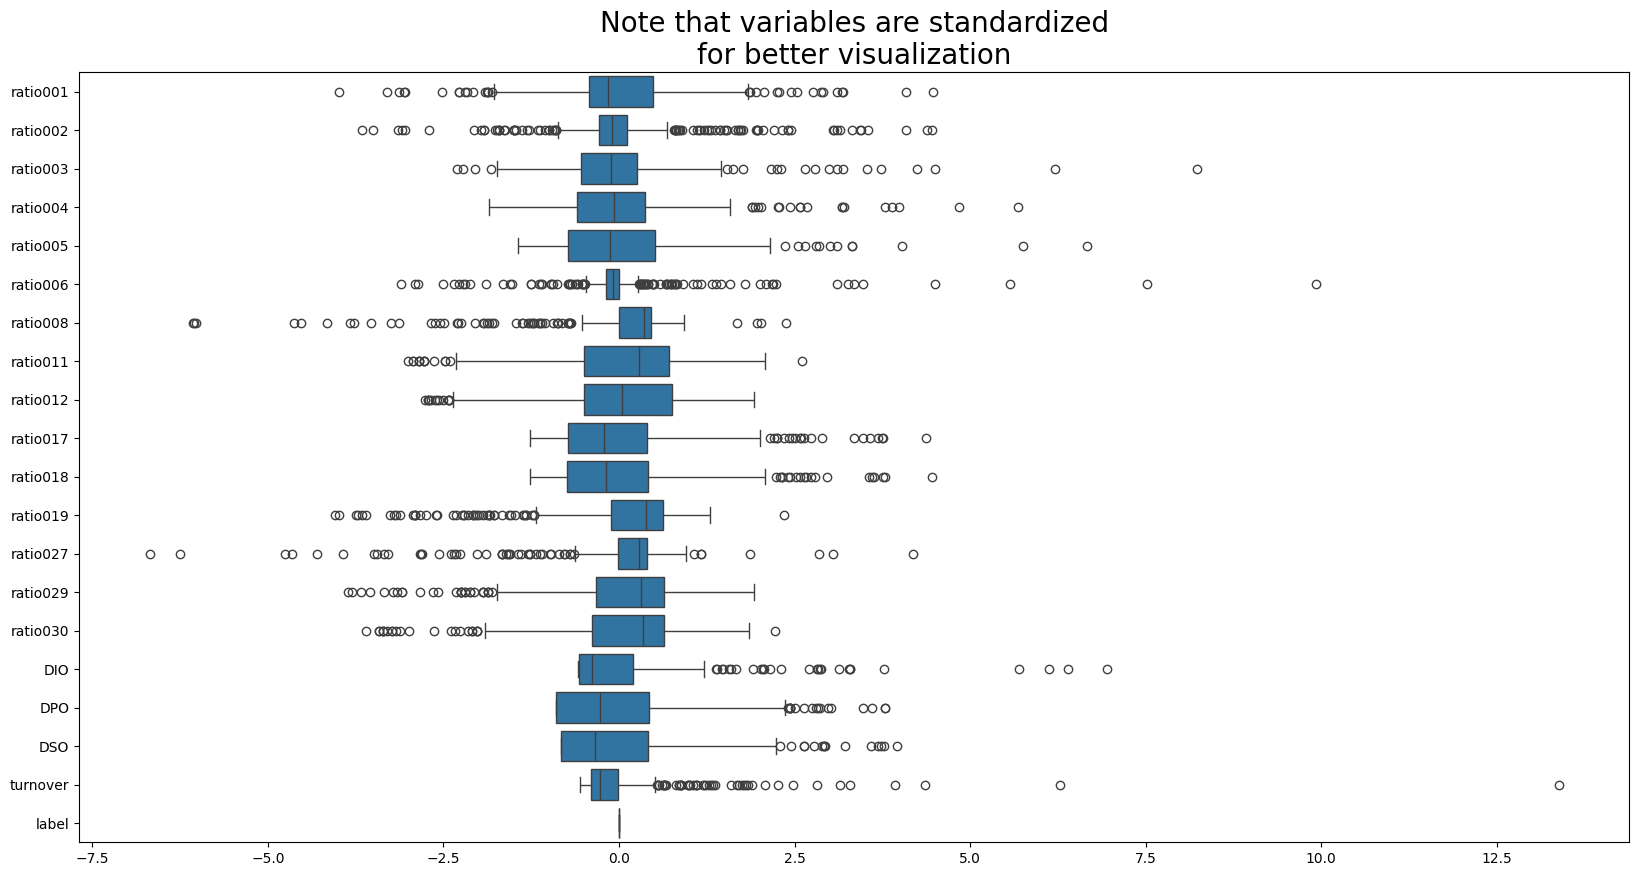

In [ ]:
# Check dispersion with box plot
box_plot(cluster_2.drop(columns="status"), standardize=True)

<Figure size 1000x1000 with 0 Axes>

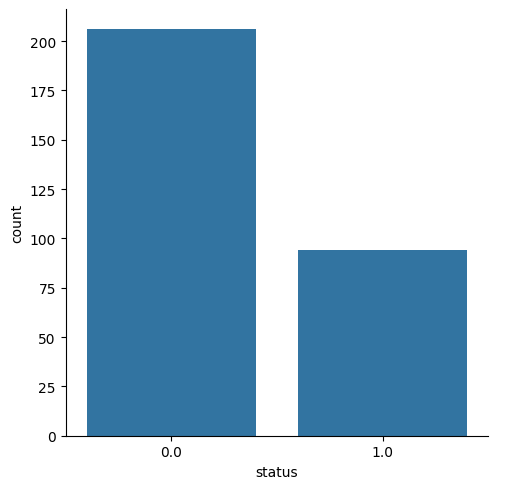

In [ ]:
# Check distribution for target variable
plt.figure(figsize=(10,10))
sns.catplot(x='status', kind="count", data=cluster_2) # categorical plots
plt.show()

In [ ]:
# Dataset is very unbalanced so we remove some observation for y=0 to be equal to 2*size of y=1.
# We keep all y=1
from sklearn.model_selection import train_test_split
data_1 = cluster_2[cluster_2['status'] == 1]
print(data_1.shape)

# We take y=0 as double the size of data_1
# Moreover we "stratify" the sampling in order to take the same distribution for each variable
# We use the train_test_split function and we keep the test only
all_data_0 = cluster_2[cluster_2['status'] == 0]
percentage_corresponding_to_double_size = 2*data_1.shape[0] / all_data_0.shape[0] # 2*size_1 compared to size_0

X = all_data_0.drop(columns=['status'])
y = all_data_0['status'].to_frame()

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)
data_0_big, data_0_small = train_test_split(all_data_0, test_size=percentage_corresponding_to_double_size,
                                                    random_state=0, shuffle=True)
print(data_0_big.shape) # remaining from the dataset
print(data_0_small.shape)

(94, 21)
(18, 21)
(188, 21)


In [ ]:
# Merge two dataset

dataset=pd.concat([data_1, data_0_small], axis= 0).reset_index(drop=True)  # axis = 1 by column and = 0 by row
print(dataset.shape)

(282, 21)


<Figure size 1000x1000 with 0 Axes>

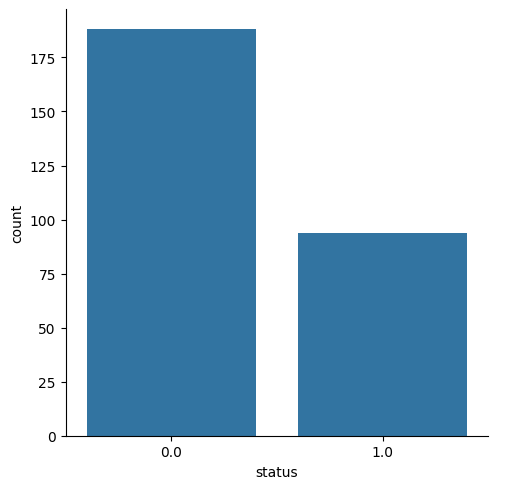

In [ ]:
# Check distribution for target variable after downsampling

plt.figure(figsize=(10,10))
sns.catplot(x='status', kind="count", data=dataset)
plt.show()

In [ ]:
X = dataset.drop(columns=['status'])
y = dataset['status'].values.reshape(-1,1)
print(X.shape)
print(y.shape)

(282, 20)
(282, 1)


In [ ]:
X = pd.DataFrame(preprocessing.StandardScaler().fit_transform(X.values), columns = X.columns)

In [ ]:
# Split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=dataset.status)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(225, 20)
(57, 20)
(225, 1)
(57, 1)


In [ ]:
# Fit the model on training set
model = LogisticRegression(solver='lbfgs', random_state=0) # solver (https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451)
model.fit(X_train,y_train) # training the algorithm

LogisticRegression(random_state=0)

In [ ]:
# Get fitted value on test set
y_test_predicted = model.predict(X_test)

# Compare predictions
display(pd.DataFrame({'True': y_test.flatten(), 'Predicted': y_test_predicted.flatten()}))

# Compare predicted probabilities (default threshold for converting to 0 or 1 is 0.5)
y_test_predicted_prob = model.predict_proba(X_test)[:,1]
display(pd.DataFrame({'True': y_test.flatten(), 'Predicted_prob': y_test_predicted_prob.flatten(), 'Predicted': y_test_predicted.flatten()}))

True  Predicted
0    0.0        0.0
1    1.0        1.0
2    1.0        0.0
3    1.0        1.0
4    0.0        0.0
5    1.0        1.0
6    1.0        1.0
7    0.0        0.0
8    0.0        0.0
9    0.0        0.0
10   0.0        0.0
11   0.0        1.0
12   0.0        0.0
13   1.0        1.0
14   1.0        1.0
15   1.0        0.0
16   0.0        0.0
17   0.0        0.0
18   1.0        1.0
19   0.0        0.0
20   1.0        1.0
21   0.0        0.0
22   0.0        1.0
23   1.0        1.0
24   0.0        0.0
25   0.0        0.0
26   0.0        1.0
27   0.0        0.0
28   0.0        1.0
29   1.0        0.0
30   0.0        0.0
31   1.0        0.0
32   0.0        0.0
33   0.0        1.0
34   1.0        0.0
35   0.0        0.0
36   0.0        0.0
37   1.0        0.0
38   0.0        0.0
39   0.0        0.0
40   1.0        0.0
41   0.0        0.0
42   0.0        0.0
43   0.0        0.0
44   0.0        0.0
45   1.0        1.0
46   1.0        1.0
47   0.0        0.0
48   0.0        0.0
49   1.0        1.0
50   0.0        0.0
51   0.0        0.0
52   0.0        0.0
53   0.0        0.0
54   0.0        0.0
55   0.0        0.0
56   0.0        0.0

True  Predicted_prob  Predicted
0    0.0        0.041874        0.0
1    1.0        0.587096        1.0
2    1.0        0.369281        0.0
3    1.0        0.967809        1.0
4    0.0        0.105902        0.0
5    1.0        0.798747        1.0
6    1.0        0.644481        1.0
7    0.0        0.003394        0.0
8    0.0        0.141095        0.0
9    0.0        0.275554        0.0
10   0.0        0.180366        0.0
11   0.0        0.835044        1.0
12   0.0        0.483057        0.0
13   1.0        0.626650        1.0
14   1.0        0.956767        1.0
15   1.0        0.433490        0.0
16   0.0        0.071854        0.0
17   0.0        0.216847        0.0
18   1.0        0.613347        1.0
19   0.0        0.230774        0.0
20   1.0        0.858086        1.0
21   0.0        0.033918        0.0
22   0.0        0.598757        1.0
23   1.0        0.968783        1.0
24   0.0        0.109196        0.0
25   0.0        0.053230        0.0
26   0.0        0.585093        1.0
27   0.0        0.025769        0.0
28   0.0        0.635004        1.0
29   1.0        0.124097        0.0
30   0.0        0.141270        0.0
31   1.0        0.226240        0.0
32   0.0        0.042156        0.0
33   0.0        0.815403        1.0
34   1.0        0.392866        0.0
35   0.0        0.053891        0.0
36   0.0        0.278476        0.0
37   1.0        0.189144        0.0
38   0.0        0.252446        0.0
39   0.0        0.281646        0.0
40   1.0        0.144190        0.0
41   0.0        0.340548        0.0
42   0.0        0.011330        0.0
43   0.0        0.121060        0.0
44   0.0        0.048679        0.0
45   1.0        0.567700        1.0
46   1.0        0.966941        1.0
47   0.0        0.189862        0.0
48   0.0        0.224194        0.0
49   1.0        0.653591        1.0
50   0.0        0.121946        0.0
51   0.0        0.080401        0.0
52   0.0        0.169317        0.0
53   0.0        0.107973        0.0
54   0.0        0.458341        0.0
55   0.0        0.364366        0.0
56   0.0        0.040327        0.0

Confusion matrix, without normalization
[[33  5]
 [ 7 12]]


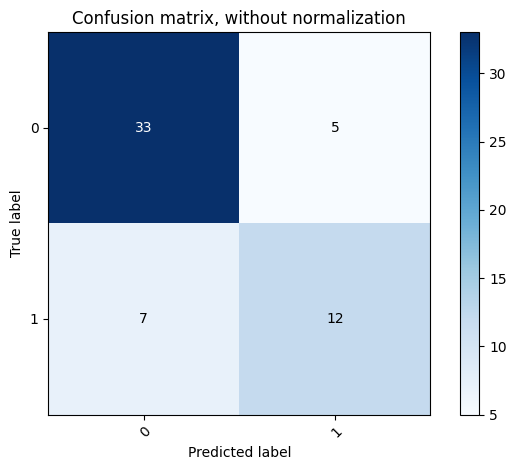

In [ ]:
# Evaluate confusion matrix
plot_confusion_matrix(y_test, y_test_predicted)
plt.show()

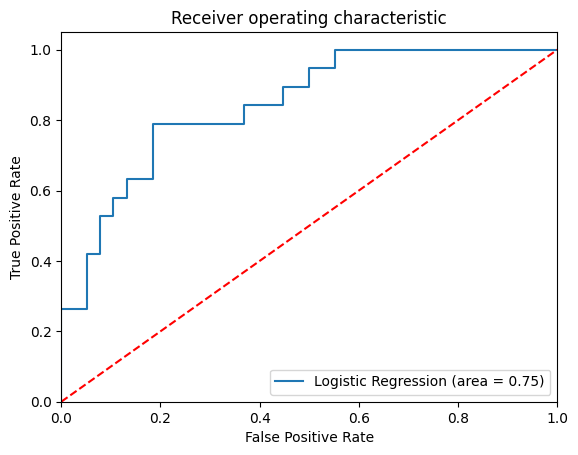

In [ ]:
logit_roc_auc = roc_auc_score(y_test, y_test_predicted)
fpr, tpr, thresholds = roc_curve(y_test, y_test_predicted_prob)


plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()